# Предсказания вкуса и удоя молока у коров 🐄

Фермер хочет приобрести для своего молочного хозяйства "Вольный луг" новых коров. Для этого он заключил контракт с ассоциацией пастбищ "ЭкоФерма". Наша задача помочь фермеру выбрать коров для покупки.

Для этого у нас есть датасет с информацией о текущем стаде фермера. На основе этого датасета необходимо подготовить 2 модели (линейная и логистическая регрессия), чтобы предсказать удой молока в кг и его вкус. Необходимо отобрать коров, которые дают более `6000` кг в год **вкусного** молока.

**Содержание**<a id='toc0_'></a>    
1. [Подготовка          ](#toc1_)    
1.1. [Библиотеки          ](#toc1_1_)    
1.2. [Конфигурация     ](#toc1_2_)    
1.3. [Сервисные функции          ](#toc1_3_)    
2. [Датасет `ferma_main`           ](#toc2_)    
2.1. [Загрузка           ](#toc2_1_)    
2.2. [Переименование колонок           ](#toc2_2_)    
2.3. [Изменение типов данных           ](#toc2_3_)    
2.4. [Обработка полных дубликатов           ](#toc2_4_)    
2.5. [Изучение пропусков           ](#toc2_5_)    
2.6. [Обработка текстовых значений    ](#toc2_6_)    
2.7. [Изучение столбцов           ](#toc2_7_)    
2.7.1. [Столбец `milk_yield`           ](#toc2_7_1_)    
2.7.2. [Столбец `energy_feed_unit`        ](#toc2_7_2_)    
2.7.3. [Столбец `raw_protein`        ](#toc2_7_3_)    
2.7.4. [Столбец `sugar_protein_ratio`        ](#toc2_7_4_)    
2.7.5. [Столбец `breed`        ](#toc2_7_5_)    
2.7.6. [Столбец `pasture_type`        ](#toc2_7_6_)    
2.7.7. [Столбец `breed_of_daddy`        ](#toc2_7_7_)    
2.7.8. [Столбец `fat_content`        ](#toc2_7_8_)    
2.7.9. [Столбец `protein`        ](#toc2_7_9_)    
2.7.10. [Столбец `milk_taste`        ](#toc2_7_10_)    
2.7.11. [Столбец `age`        ](#toc2_7_11_)    
3. [Датасет `ferma_dad`           ](#toc3_)    
3.1. [Загрузка      ](#toc3_1_)    
3.2. [Переименование колонок      ](#toc3_2_)    
3.3. [Обработка текстовых значений    ](#toc3_3_)    
3.4. [Изучение пропусков      ](#toc3_4_)    
3.5. [Изучение столбца `name_of_daddy`      ](#toc3_5_)    
4. [Датасет `cow_buy`           ](#toc4_)    
4.1. [Загрузка       ](#toc4_1_)    
4.2. [Переименование колонок       ](#toc4_2_)    
4.3. [Изменение типов данных       ](#toc4_3_)    
4.4. [Обработка текстовых значений    ](#toc4_4_)    
4.5. [Обработка полных дубликатов       ](#toc4_5_)    
4.6. [Изучение пропусков       ](#toc4_6_)    
4.7. [Изучение столбцов      ](#toc4_7_)    
4.7.1. [Столбец `breed`      ](#toc4_7_1_)    
4.7.2. [Столбец `pasture_type`      ](#toc4_7_2_)    
4.7.3. [Столбец `breed_of_daddy`      ](#toc4_7_3_)    
4.7.4. [Столбец `name_of_daddy`      ](#toc4_7_4_)    
4.7.5. [Столбец `fat_content`      ](#toc4_7_5_)    
4.7.6. [Столбец `protein`      ](#toc4_7_6_)    
4.7.7. [Столбец `age`      ](#toc4_7_7_)    
4.8. [Промежуточный вывод ](#toc4_8_)    
5. [Проверка корреляции     ](#toc5_)    
6. [Регрессия     ](#toc6_)    
6.1. [Подготовка    ](#toc6_1_)    
6.2. [Первая модель    ](#toc6_2_)    
6.3. [Вторая модель    ](#toc6_3_)    
6.4. [Третья модель    ](#toc6_4_)    
6.5. [Оценка    ](#toc6_5_)    
6.6. [Предсказание    ](#toc6_6_)    
7. [Классификация    ](#toc7_)    
7.1. [Предсказание   ](#toc7_1_)    
8. [Общий вывод  ](#toc8_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>Подготовка           [&#8593;](#toc0_)

### 1.1. <a id='toc1_1_'></a>Библиотеки           [&#8593;](#toc0_)

In [1]:
from IPython.display import clear_output

In [2]:
from platform import python_version
version = python_version()

if version.startswith('3.9'):  
    pass
    %pip install --force-reinstall -v "numpy==1.22.4" -q
else: 
    pass
    %pip install --upgrade numpy -q   

%pip install --force-reinstall -v "matplotlib==3.8.0" -q

%pip install --upgrade phik -q
%pip install --upgrade prettytable -q
%pip install --upgrade termcolor -q
%pip install --upgrade seaborn -q
%pip install --upgrade pandas -q
%pip install --upgrade statsmodels -q
%pip install --upgrade scikit-learn -q
%pip install --upgrade shap -q

clear_output()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import shap

from os import path
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import (
    LinearRegression,
    LogisticRegression)
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler)
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    root_mean_squared_error,
    recall_score,
    precision_score,
    r2_score,
    ConfusionMatrixDisplay,
    classification_report,
    PrecisionRecallDisplay)
from phik import phik_matrix  # this import IS accessed
from prettytable import PrettyTable
from termcolor import colored

### 1.2. <a id='toc1_2_'></a>Конфигурация      [&#8593;](#toc0_)

In [4]:
RANDOM_STATE = 27
pd.options.display.float_format = '{:.2f}'.format

### 1.3. <a id='toc1_3_'></a>Сервисные функции           [&#8593;](#toc0_)

In [5]:
scaler = StandardScaler()
encoder = OneHotEncoder(drop='first', sparse_output=False)

In [6]:
def process_numeric_columns(df: pd.DataFrame, cols: list[str]) -> pd.DataFrame:
    def process_str_value(s: str) -> float:
        return float(s.replace(',', '.'))
    
    for col in cols:
        df[col] = df[col].apply(process_str_value)
        
    return df

In [7]:
def print_table_about_nans(data: pd.DataFrame) -> None:
    table = PrettyTable()
    table.field_names = ['Feature', 'Missing values count']
    
    missing_info = data.isna().sum().sort_values()
    cols = missing_info.index.to_list()
    for col in cols:
        count = missing_info[col]
        color = 'green' if count == 0 else 'red'
        s = f'{count} ({count / len(data):.2%})'
        table.add_row([col, colored(s, color)])
    
    print(table)

In [8]:
def draw_plots_about_column(df: pd.DataFrame,
                            column: str,
                            column_description: str,
                            bins: int = 20
                            ) -> None:
    _, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10))
    
    sns.violinplot(df, x=column, ax=ax1, orient='h')
    ax1.set_xlabel(column_description)
    ax1.grid()
    
    sns.boxplot(df, x=column, ax=ax2)
    ax2.set_xlabel(column_description)
    ax2.grid()
    
    sns.histplot(df, x=column, bins=bins, ax=ax3)
    ax3.set_xlabel(column_description)
    ax3.grid()
    ax3.set_ylabel('Количество')
    
    ax4.set_visible(False)
    
    plt.suptitle(f'Информация о колонке `{column_description}`', fontsize=18)
    plt.tight_layout()

    plt.show()

In [9]:
def plot_pie_chart(series: pd.Series, title: str) -> None:
    _table = series.value_counts()
    data, labels = _table.values, _table.index
    plt.pie(data, labels=labels, autopct='%.0f%%')
    plt.title(title)
    plt.show()

In [10]:
def process_and_split(X: pd.DataFrame,
                      y: pd.DataFrame,
                      num_cols: list[str],
                      cat_cols: list[str],
                      stratify_by = None
                      ) -> tuple[pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame]:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, stratify=stratify_by)
    
    X_train_encoded = pd.DataFrame(encoder.fit_transform(X_train[cat_cols]), columns=encoder.get_feature_names_out())
    X_test_encoded = pd.DataFrame(encoder.transform(X_test[cat_cols]), columns=encoder.get_feature_names_out())
    
    X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=num_cols)
    X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=num_cols)
    
    X_train = pd.concat([X_train_scaled, X_train_encoded], axis=1)
    X_test = pd.concat([X_test_scaled, X_test_encoded], axis=1)
    
    X_train = X_train.sort_index(axis=1)
    X_test = X_test.sort_index(axis=1)
    
    return X_train, X_test, y_train, y_test

In [11]:
def get_info_about_residuals(y_true: pd.DataFrame,
                             y_pred: np.ndarray
                             ) -> None:

    residuals = y_true - y_pred

    # Распределение остатков
    plt.figure(figsize=(8, 6))
    plt.hist(residuals, bins=30, edgecolor='black')
    plt.axvline(x=residuals.mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(x=0, color='blue', linestyle='--', label='Zero level')
    plt.title('Гистограмма остатков')
    plt.xlabel('Остатки')
    plt.ylabel('Количество')
    plt.legend()
    plt.show()

    # Оценка дисперсии остатков
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals)
    plt.axhline(y=0, color='r', linestyle='--', label='Zero level')
    plt.title('Дисперсия остатков')
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Остатки')
    plt.show()

In [12]:
def get_metrics(y_true: np.ndarray, y_pred: np.ndarray) -> list[str]:
    return ([
              f'{r2_score(y_true, y_pred):.2f}',
              f'{mean_absolute_error(y_true, y_pred):.2f}',
              f'{mean_squared_error(y_true, y_pred):.2f}',
              f'{root_mean_squared_error(y_true, y_pred):.2f}'])

## 2. <a id='toc2_'></a>Датасет `ferma_main`            [&#8593;](#toc0_)

### 2.1. <a id='toc2_1_'></a>Загрузка            [&#8593;](#toc0_)

In [13]:
# data is not presented due to copyright
ferma_main = pd.read_csv('', sep=';', index_col='id', decimal=',')
ferma_main.head()

,"Удой, кг",ЭКЕ (Энергетическая кормовая единица),"Сырой протеин, г",СПО (Сахаро-протеиновое соотношение),Порода,Тип пастбища,порода папы_быка,"Жирность,%","Белок,%",Вкус молока,Возраст
id,,,,,,,,,,,
1,5863,14.20,1743,0.89,Вис Бик Айдиал,Равнинное,Айдиал,3.58,3.08,вкусно,более_2_лет
2,5529,12.80,2138,0.89,Вис Бик Айдиал,Равнинные,Соверин,3.54,3.08,вкусно,менее_2_лет
3,5810,14.00,1854,0.89,РефлешнСоверинг,Холмистое,Соверин,3.59,3.07,не вкусно,более_2_лет
4,5895,12.40,2012,0.89,РефлешнСоверинг,Холмистое,Айдиал,3.40,3.08,не вкусно,более_2_лет
5,5302,12.80,1675,0.89,Вис Бик Айдиал,Равнинные,Соверин,3.73,3.07,вкусно,менее_2_лет


### 2.2. <a id='toc2_2_'></a>Переименование колонок            [&#8593;](#toc0_)

Названия столбцов на русском не соответствуют стандартам. Переименуем столбцы, заменим их англоязычными.

In [14]:
ferma_main = ferma_main.rename(columns={
   'Удой, кг': 'milk_yield',
   'ЭКЕ (Энергетическая кормовая единица)': 'energy_feed_unit',
   'Сырой протеин, г': 'raw_protein',
   'СПО (Сахаро-протеиновое соотношение)': 'sugar_protein_ratio',
   'Порода': 'breed',
   'Тип пастбища': 'pasture_type',
   'порода папы_быка': 'breed_of_daddy',
   'Жирность,%': 'fat_content',
   'Белок,%': 'protein',
   'Вкус молока': 'milk_taste',
   'Возраст': 'age',
}, errors='raise')

### 2.3. <a id='toc2_3_'></a>Изменение типов данных            [&#8593;](#toc0_)

In [15]:
ferma_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 634 entries, 1 to 627
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   milk_yield           634 non-null    int64  
 1   energy_feed_unit     634 non-null    float64
 2   raw_protein          634 non-null    int64  
 3   sugar_protein_ratio  634 non-null    float64
 4   breed                634 non-null    object 
 5   pasture_type         634 non-null    object 
 6   breed_of_daddy       634 non-null    object 
 7   fat_content          634 non-null    float64
 8   protein              634 non-null    float64
 9   milk_taste           634 non-null    object 
 10  age                  634 non-null    object 
dtypes: float64(4), int64(2), object(5)
memory usage: 59.4+ KB


Все колонки имеют верные типы данных.

### 2.4. <a id='toc2_4_'></a>Обработка полных дубликатов            [&#8593;](#toc0_)

In [16]:
ferma_main.duplicated().sum()

5

In [17]:
ferma_main = ferma_main.drop_duplicates()

In [18]:
ferma_main.duplicated().sum()

0

### 2.5. <a id='toc2_5_'></a>Изучение пропусков            [&#8593;](#toc0_)

In [19]:
print_table_about_nans(ferma_main)

+---------------------+----------------------+
|       Feature       | Missing values count |
+---------------------+----------------------+
|      milk_yield     |      0 (0.00%)       |
|   energy_feed_unit  |      0 (0.00%)       |
|     raw_protein     |      0 (0.00%)       |
| sugar_protein_ratio |      0 (0.00%)       |
|        breed        |      0 (0.00%)       |
|     pasture_type    |      0 (0.00%)       |
|    breed_of_daddy   |      0 (0.00%)       |
|     fat_content     |      0 (0.00%)       |
|       protein       |      0 (0.00%)       |
|      milk_taste     |      0 (0.00%)       |
|         age         |      0 (0.00%)       |
+---------------------+----------------------+


### 2.6. <a id='toc2_6_'></a>Обработка текстовых значений     [&#8593;](#toc0_)

In [20]:
_cols = ['breed', 'pasture_type', 'breed_of_daddy', 'age']
for col in _cols:
    ferma_main[col] = ferma_main[col].str.lower().str.strip()

### 2.7. <a id='toc2_7_'></a>Изучение столбцов            [&#8593;](#toc0_)

In [21]:
ferma_main.describe()

,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,fat_content,protein
count,629.00,629.00,629.00,629.00,629.00,629.00
mean,6188.75,14.54,1923.36,0.91,3.60,3.08
std,1644.80,1.31,182.96,0.03,0.17,0.00
min,5204.00,10.90,1660.00,0.84,2.99,3.07
25%,5751.00,13.50,1771.00,0.89,3.59,3.07
50%,6133.00,14.70,1888.00,0.93,3.65,3.08
75%,6501.00,15.60,2062.00,0.94,3.72,3.08
max,45616.00,16.80,2349.00,0.96,3.75,3.08


#### 2.7.1. <a id='toc2_7_1_'></a>Столбец `milk_yield`            [&#8593;](#toc0_)

In [22]:
ferma_main['milk_yield'].describe()

count     629.00
mean     6188.75
std      1644.80
min      5204.00
25%      5751.00
50%      6133.00
75%      6501.00
max     45616.00
Name: milk_yield, dtype: float64

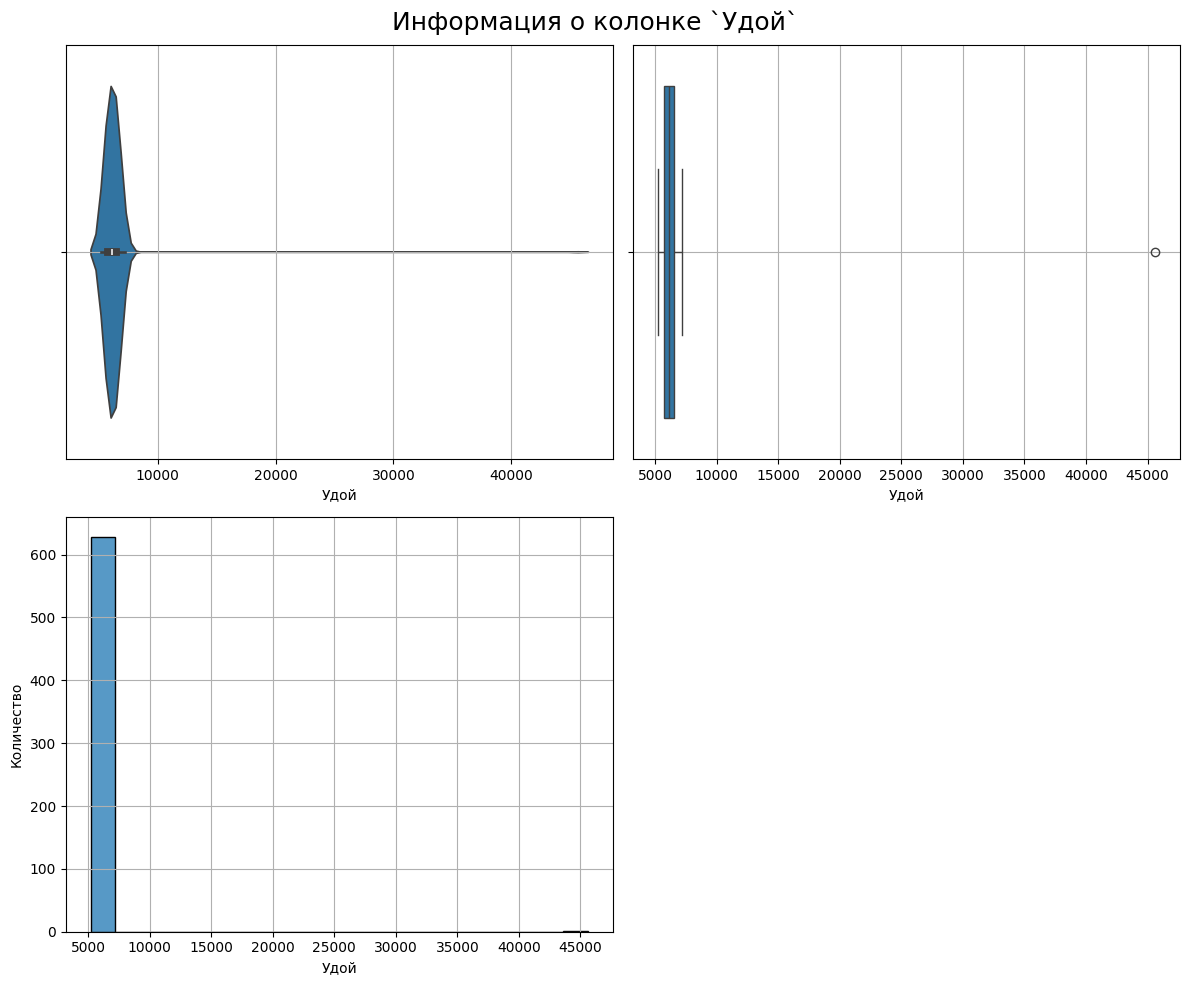

In [23]:
draw_plots_about_column(ferma_main, 'milk_yield', 'Удой')

Видим, что есть очень серьезные выбросы. Посмотрим их в таблице.

In [24]:
ferma_main.query('milk_yield >= 10000')

,milk_yield,energy_feed_unit,raw_protein,sugar_protein_ratio,breed,pasture_type,breed_of_daddy,fat_content,protein,milk_taste,age
id,,,,,,,,,,,
17,45616,11.50,1675,0.93,вис бик айдиал,холмистое,айдиалл,3.22,3.08,вкусно,более_2_лет


Данное значение невероятно выбивается из общей картины. Удалим данную строку и визуализируем снова.

In [25]:
ferma_main.shape

(629, 11)

In [26]:
_mask = ferma_main['milk_yield'] <= 10_000
ferma_main = ferma_main[_mask]

In [27]:
ferma_main.shape

(628, 11)

In [28]:
ferma_main['milk_yield'].describe()

count    628.00
mean    6125.97
std      475.86
min     5204.00
25%     5749.75
50%     6132.50
75%     6501.00
max     7222.00
Name: milk_yield, dtype: float64

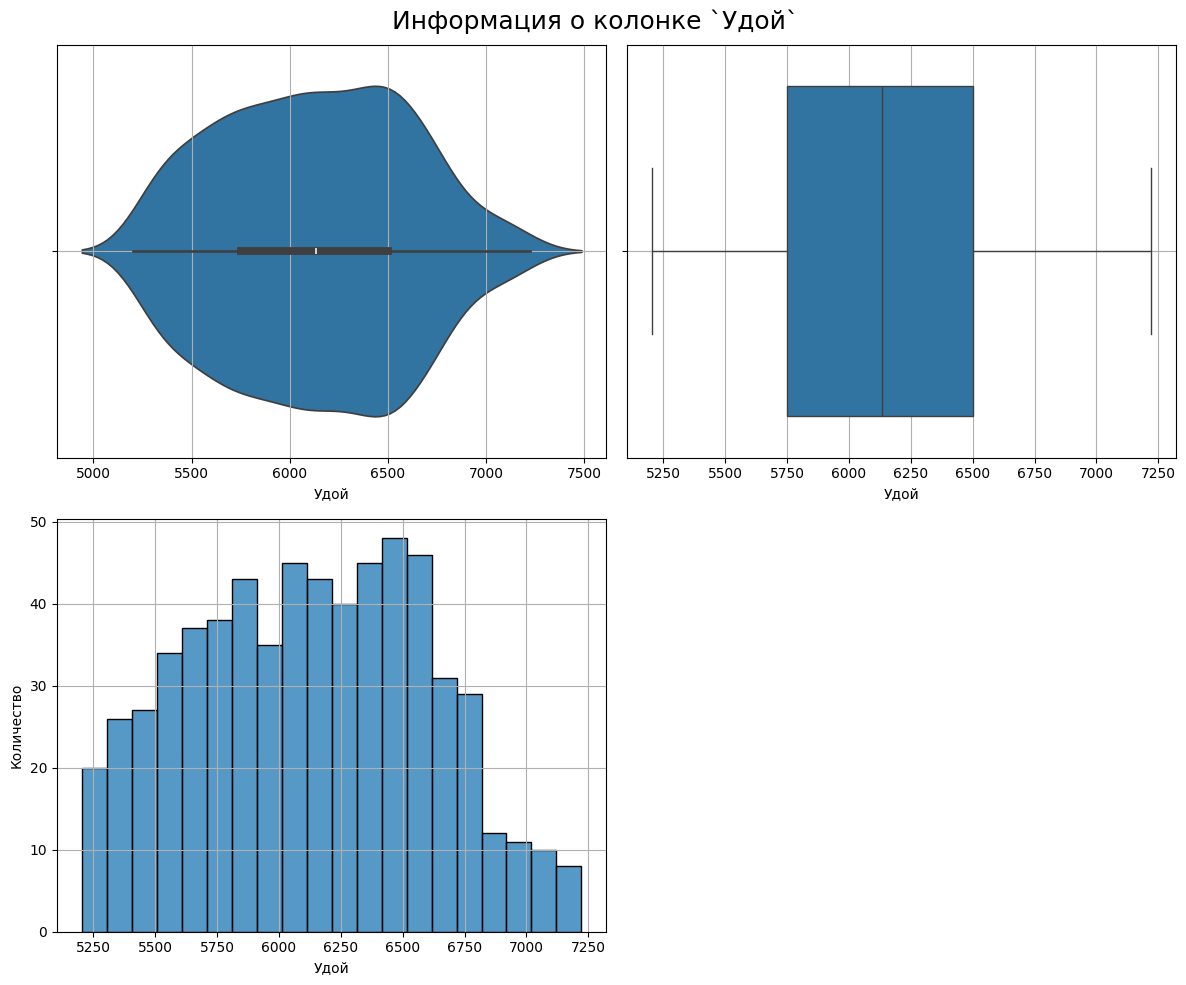

In [29]:
draw_plots_about_column(ferma_main, 'milk_yield', 'Удой')

Теперь картина смотрится куда более адекватно. По ящику с усами видно, что выбросов нет.

#### 2.7.2. <a id='toc2_7_2_'></a>Столбец `energy_feed_unit`         [&#8593;](#toc0_)

In [30]:
ferma_main['energy_feed_unit'].describe()

count   628.00
mean     14.55
std       1.30
min      10.90
25%      13.50
50%      14.70
75%      15.60
max      16.80
Name: energy_feed_unit, dtype: float64

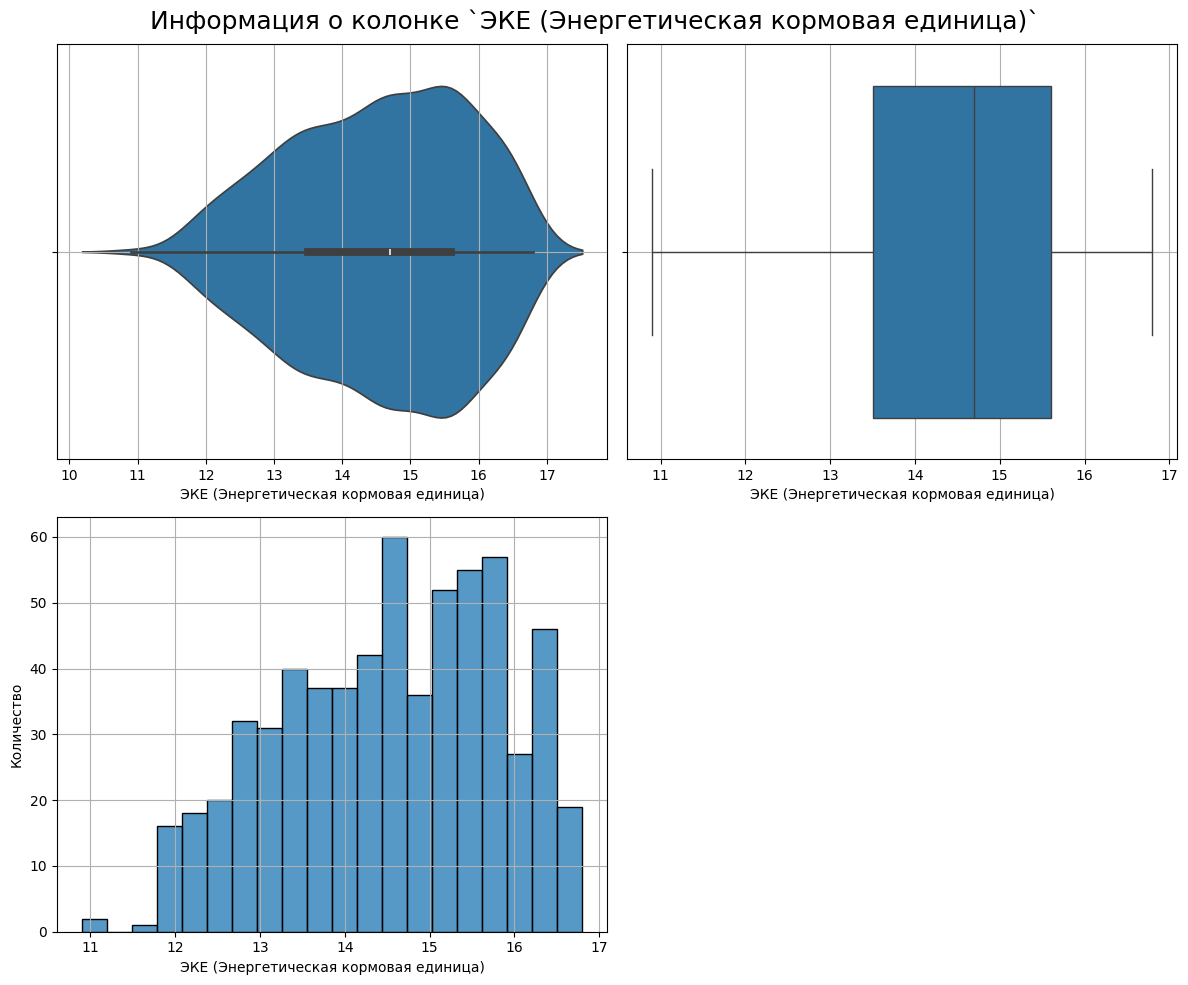

In [31]:
draw_plots_about_column(ferma_main, 'energy_feed_unit', 'ЭКЕ (Энергетическая кормовая единица)')

#### 2.7.3. <a id='toc2_7_3_'></a>Столбец `raw_protein`         [&#8593;](#toc0_)

In [32]:
ferma_main['raw_protein'].describe()

count    628.00
mean    1923.76
std      182.83
min     1660.00
25%     1771.75
50%     1888.00
75%     2062.25
max     2349.00
Name: raw_protein, dtype: float64

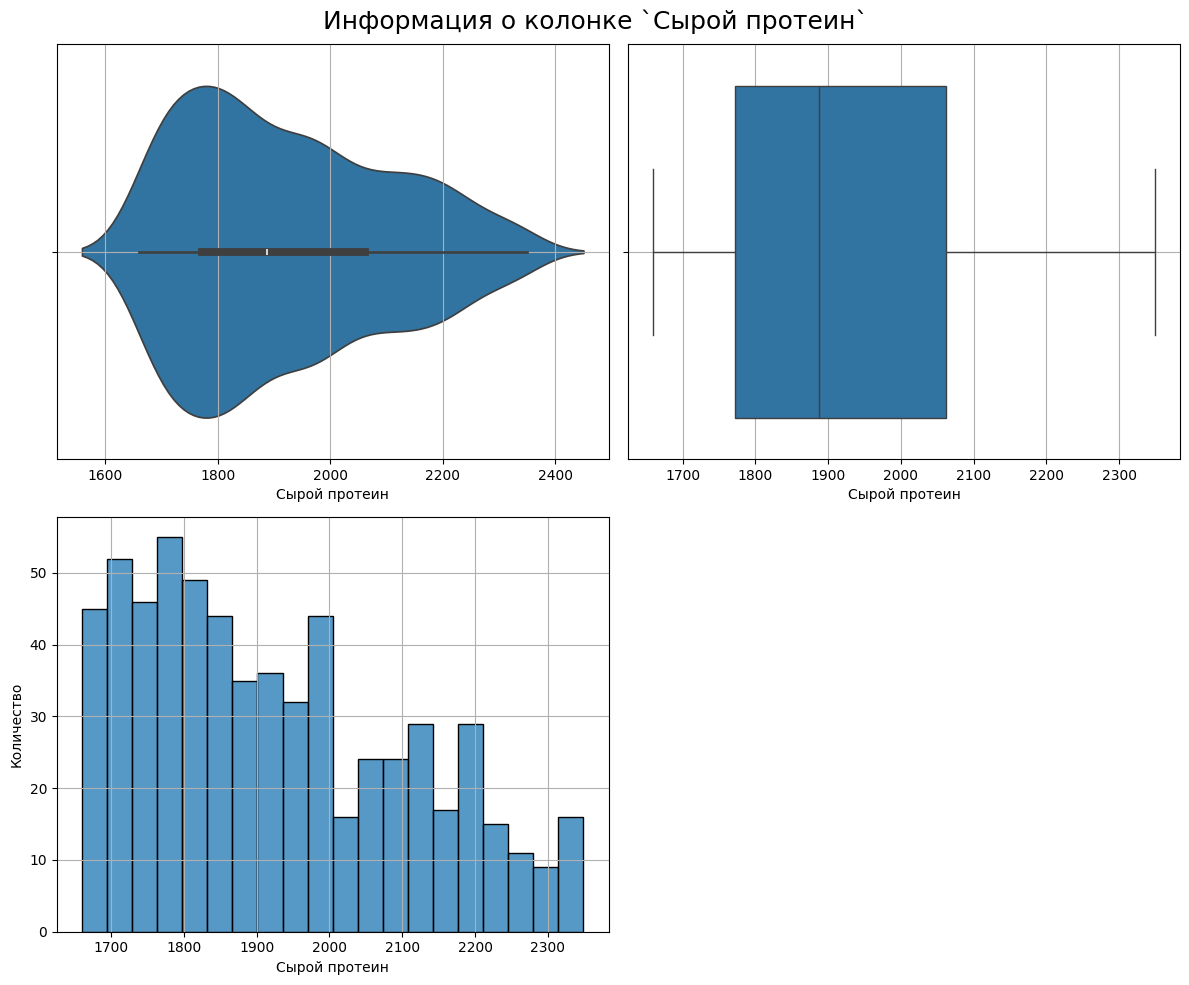

In [33]:
draw_plots_about_column(ferma_main, 'raw_protein', 'Сырой протеин')

#### 2.7.4. <a id='toc2_7_4_'></a>Столбец `sugar_protein_ratio`         [&#8593;](#toc0_)

In [34]:
ferma_main['sugar_protein_ratio'].describe()

count   628.00
mean      0.91
std       0.03
min       0.84
25%       0.89
50%       0.93
75%       0.94
max       0.96
Name: sugar_protein_ratio, dtype: float64

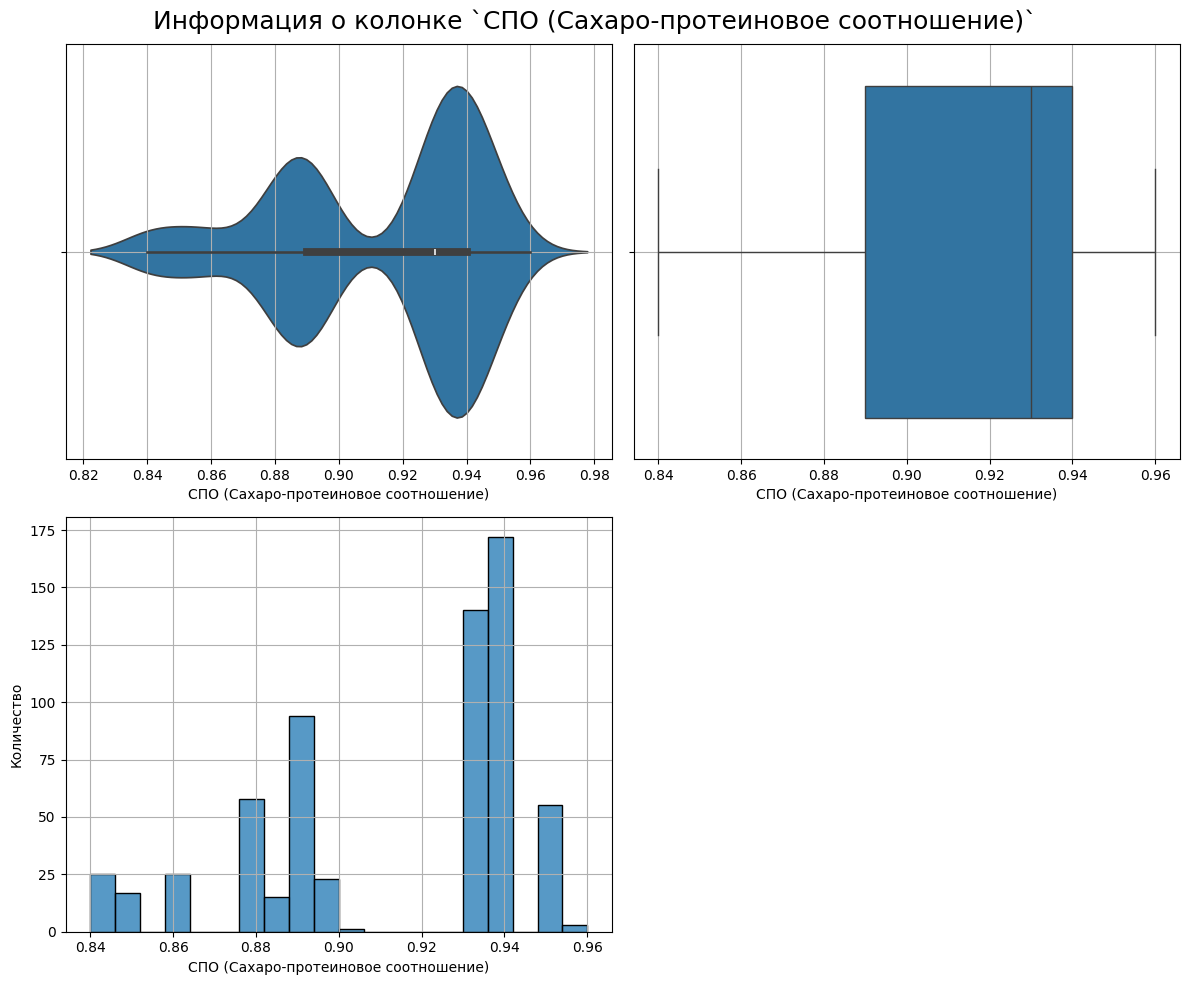

In [35]:
draw_plots_about_column(ferma_main, 'sugar_protein_ratio', 'СПО (Сахаро-протеиновое соотношение)')

#### 2.7.5. <a id='toc2_7_5_'></a>Столбец `breed`         [&#8593;](#toc0_)

In [36]:
ferma_main['breed'].value_counts()

breed
вис бик айдиал     372
рефлешнсоверинг    256
Name: count, dtype: int64

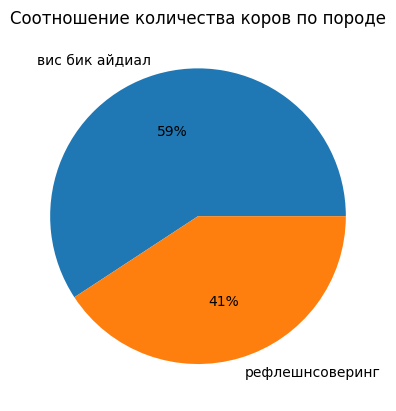

In [37]:
plot_pie_chart(ferma_main['breed'], 'Соотношение количества коров по породе')

#### 2.7.6. <a id='toc2_7_6_'></a>Столбец `pasture_type`         [&#8593;](#toc0_)

In [38]:
ferma_main['pasture_type'].value_counts()

pasture_type
холмистое    350
равнинное    253
равнинные     25
Name: count, dtype: int64

Обнаружены неявные дубликаты. Устраним их.

In [39]:
_mask =  ferma_main['pasture_type'] == 'равнинные'
ferma_main.loc[_mask, 'pasture_type'] = 'равнинное'

In [40]:
ferma_main['pasture_type'].value_counts()

pasture_type
холмистое    350
равнинное    278
Name: count, dtype: int64

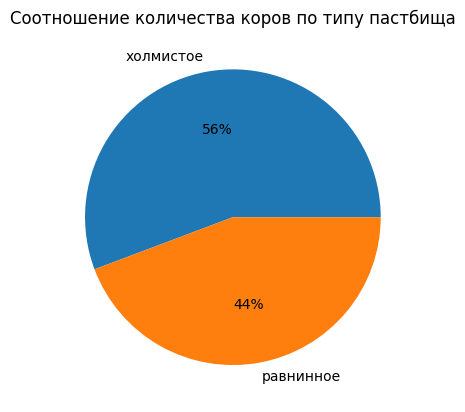

In [41]:
plot_pie_chart(ferma_main['pasture_type'], 'Соотношение количества коров по типу пастбища')

#### 2.7.7. <a id='toc2_7_7_'></a>Столбец `breed_of_daddy`         [&#8593;](#toc0_)

In [42]:
ferma_main['breed_of_daddy'].value_counts()

breed_of_daddy
соверин    311
айдиал     240
айдиалл     77
Name: count, dtype: int64

Здесь также обнаружены неявные дубликаты. Удалим и их тоже.

In [43]:
_mask = ferma_main['breed_of_daddy'] == 'айдиалл'
ferma_main.loc[_mask, 'breed_of_daddy'] = 'айдиал'

In [44]:
ferma_main['breed_of_daddy'].value_counts()

breed_of_daddy
айдиал     317
соверин    311
Name: count, dtype: int64

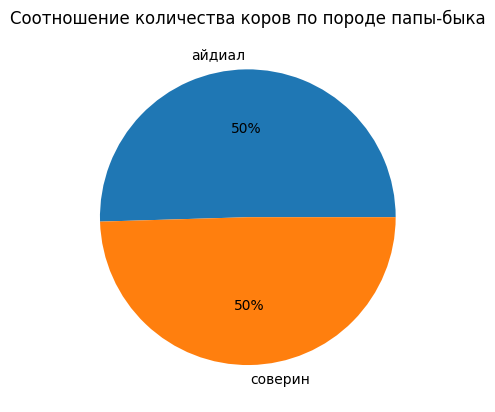

In [45]:
plot_pie_chart(ferma_main['breed_of_daddy'], 'Соотношение количества коров по породе папы-быка')

#### 2.7.8. <a id='toc2_7_8_'></a>Столбец `fat_content`         [&#8593;](#toc0_)

In [46]:
ferma_main['fat_content'].describe()

count   628.00
mean      3.60
std       0.17
min       2.99
25%       3.59
50%       3.65
75%       3.72
max       3.75
Name: fat_content, dtype: float64

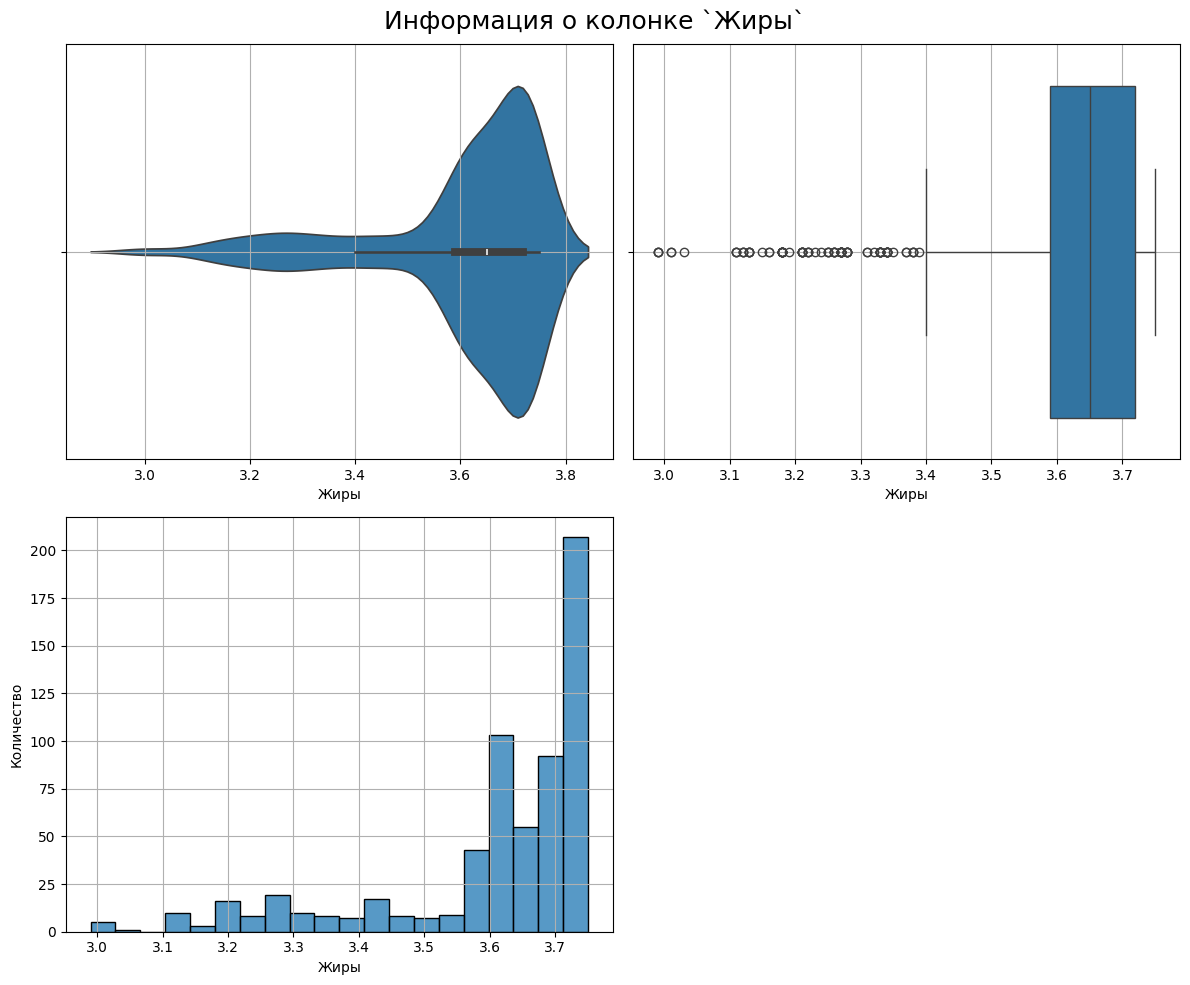

In [47]:
draw_plots_about_column(ferma_main, 'fat_content', 'Жиры')

#### 2.7.9. <a id='toc2_7_9_'></a>Столбец `protein`         [&#8593;](#toc0_)

In [48]:
ferma_main['protein'].describe()

count   628.00
mean      3.08
std       0.00
min       3.07
25%       3.07
50%       3.08
75%       3.08
max       3.08
Name: protein, dtype: float64

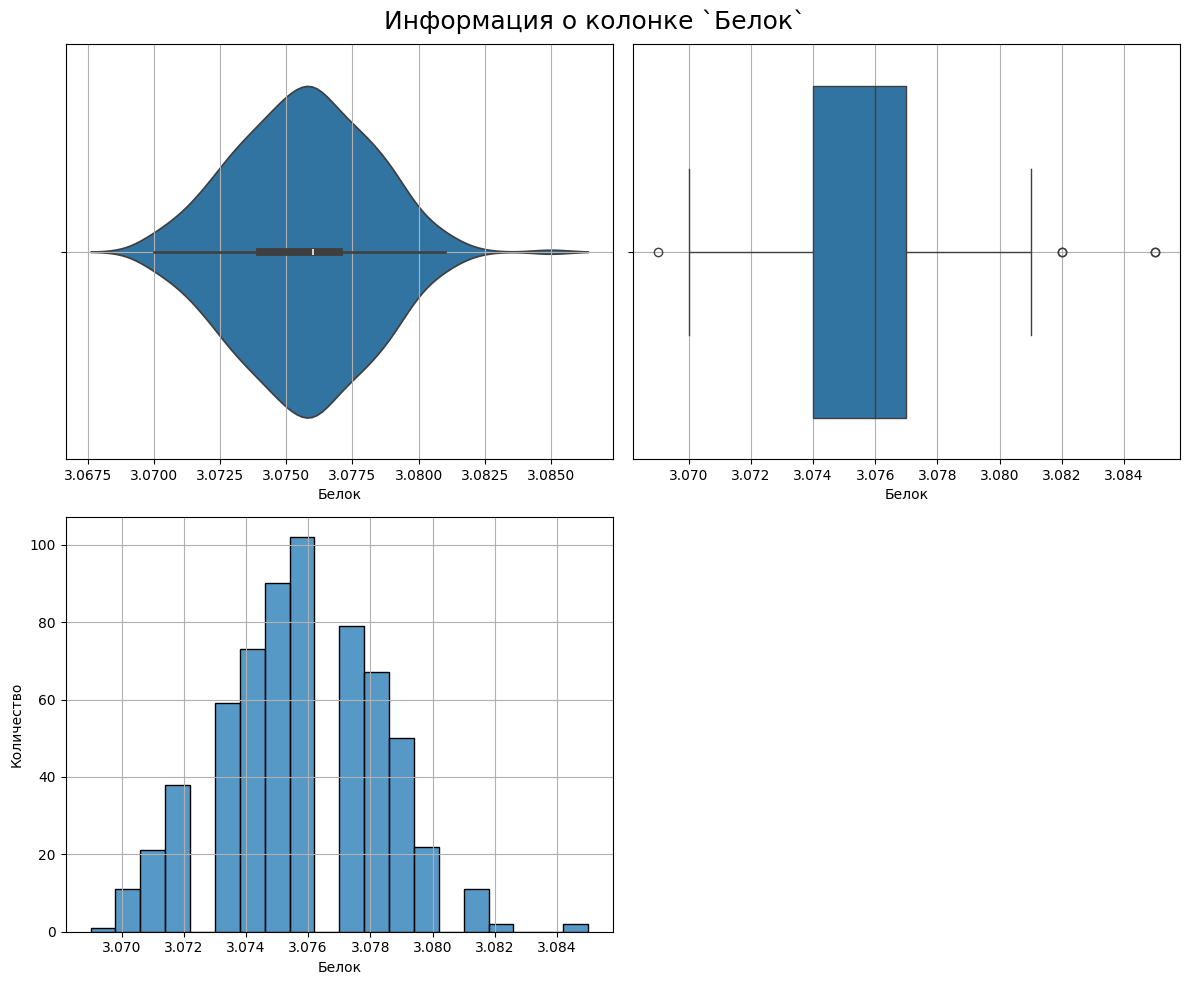

In [49]:
draw_plots_about_column(ferma_main, 'protein', 'Белок')

#### 2.7.10. <a id='toc2_7_10_'></a>Столбец `milk_taste`         [&#8593;](#toc0_)

In [50]:
ferma_main['milk_taste'].value_counts()

milk_taste
вкусно       370
не вкусно    258
Name: count, dtype: int64

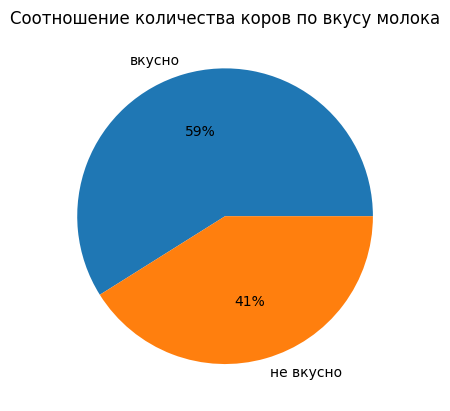

In [51]:
plot_pie_chart(ferma_main['milk_taste'], 'Соотношение количества коров по вкусу молока')

#### 2.7.11. <a id='toc2_7_11_'></a>Столбец `age`         [&#8593;](#toc0_)

In [52]:
ferma_main['age'].value_counts()

age
более_2_лет    518
менее_2_лет    110
Name: count, dtype: int64

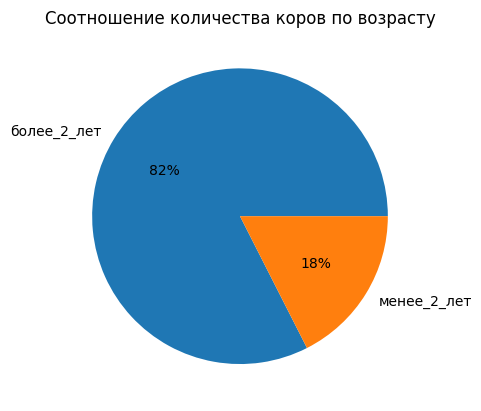

In [53]:
plot_pie_chart(ferma_main['age'], 'Соотношение количества коров по возрасту')

## 3. <a id='toc3_'></a>Датасет `ferma_dad`            [&#8593;](#toc0_)

### 3.1. <a id='toc3_1_'></a>Загрузка       [&#8593;](#toc0_)

In [54]:
# data is not presented due to copyright
ferma_dad = pd.read_csv('', sep=';', index_col='id')
ferma_dad.head()

,Имя Папы
id,
1,Буйный
2,Соловчик
3,Барин
4,Буйный
5,Барин


### 3.2. <a id='toc3_2_'></a>Переименование колонок       [&#8593;](#toc0_)

In [55]:
ferma_dad.columns = ['name_of_daddy']

### 3.3. <a id='toc3_3_'></a>Обработка текстовых значений     [&#8593;](#toc0_)

In [56]:
ferma_dad['name_of_daddy'] = ferma_dad['name_of_daddy'].str.lower().str.strip()

### 3.4. <a id='toc3_4_'></a>Изучение пропусков       [&#8593;](#toc0_)

In [57]:
print_table_about_nans(ferma_dad)

+---------------+----------------------+
|    Feature    | Missing values count |
+---------------+----------------------+
| name_of_daddy |      0 (0.00%)       |
+---------------+----------------------+


### 3.5. <a id='toc3_5_'></a>Изучение столбца `name_of_daddy`       [&#8593;](#toc0_)

In [58]:
ferma_dad['name_of_daddy'].value_counts()

name_of_daddy
барин       240
буйный      215
соловчик    110
геркулес     64
Name: count, dtype: int64

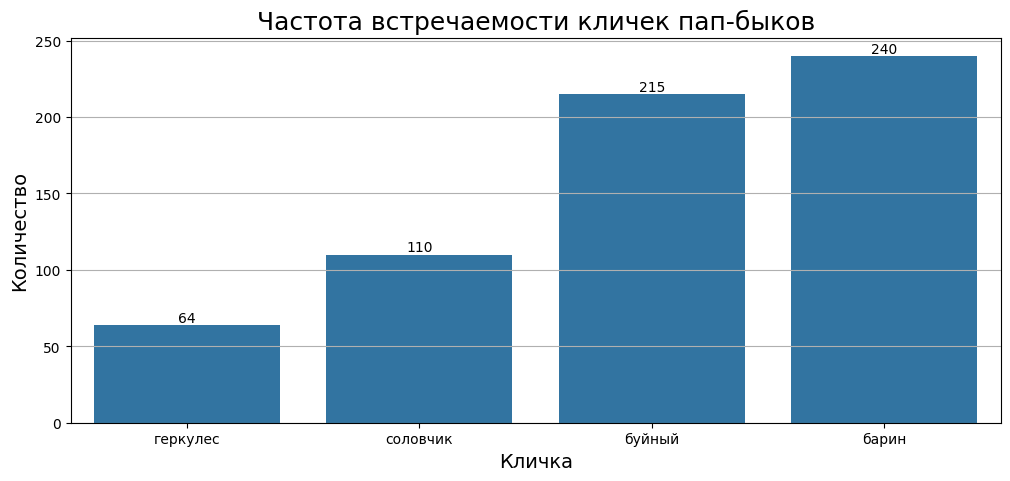

In [59]:
plt.figure(figsize=(12, 5))
ax = sns.countplot(data=ferma_dad,
                   x='name_of_daddy',
                   order=ferma_dad['name_of_daddy']
                       .value_counts()
                       .sort_values()
                       .index)
plt.grid(axis='y')
ax.bar_label(ax.containers[0]);
ax.set_title('Частота встречаемости кличек пап-быков', fontsize=18)
ax.set_xlabel('Кличка', fontsize=14)
ax.set_ylabel('Количество', fontsize=14)
plt.show()

## 4. <a id='toc4_'></a>Датасет `cow_buy`            [&#8593;](#toc0_)

### 4.1. <a id='toc4_1_'></a>Загрузка        [&#8593;](#toc0_)

In [60]:
# data is not presented due to copyright
cow_buy = pd.read_csv('', sep=';')
cow_buy.head()

,Порода,Тип пастбища,порода папы_быка,Имя_папы,"Текущая_жирность,%","Текущий_уровень_белок,%",Возраст
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,"3,58","3,076",более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,"3,54","3,081",менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,"3,59","3,074",более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,"3,4","3,061",более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,"3,64","3,074",более_2_лет


### 4.2. <a id='toc4_2_'></a>Переименование колонок        [&#8593;](#toc0_)

In [61]:
cow_buy = cow_buy.rename(columns={
    'Порода': 'breed',
    'Тип пастбища': 'pasture_type',
    'порода папы_быка': 'breed_of_daddy',
    'Имя_папы': 'name_of_daddy',
    'Текущая_жирность,%': 'fat_content',
    'Текущий_уровень_белок,%': 'protein',
    'Возраст': 'age'
})

In [62]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   breed           20 non-null     object
 1   pasture_type    20 non-null     object
 2   breed_of_daddy  20 non-null     object
 3   name_of_daddy   20 non-null     object
 4   fat_content     20 non-null     object
 5   protein         20 non-null     object
 6   age             20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


### 4.3. <a id='toc4_3_'></a>Изменение типов данных        [&#8593;](#toc0_)

In [63]:
cow_buy = process_numeric_columns(cow_buy, ['fat_content', 'protein'])

In [64]:
cow_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   breed           20 non-null     object 
 1   pasture_type    20 non-null     object 
 2   breed_of_daddy  20 non-null     object 
 3   name_of_daddy   20 non-null     object 
 4   fat_content     20 non-null     float64
 5   protein         20 non-null     float64
 6   age             20 non-null     object 
dtypes: float64(2), object(5)
memory usage: 1.2+ KB


In [65]:
cow_buy.head()

,breed,pasture_type,breed_of_daddy,name_of_daddy,fat_content,protein,age
0,Вис Бик Айдиал,холмистое,Айдиал,Геркулес,3.58,3.08,более_2_лет
1,Вис Бик Айдиал,равнинное,Соверин,Буйный,3.54,3.08,менее_2_лет
2,РефлешнСоверинг,равнинное,Соверин,Барин,3.59,3.07,более_2_лет
3,РефлешнСоверинг,холмистое,Айдиал,Буйный,3.40,3.06,более_2_лет
4,РефлешнСоверинг,равнинное,Айдиал,Буйный,3.64,3.07,более_2_лет


### 4.4. <a id='toc4_4_'></a>Обработка текстовых значений     [&#8593;](#toc0_)

In [66]:
_cols = ['breed', 'pasture_type', 'breed_of_daddy', 'name_of_daddy', 'age']
for col in _cols:
    cow_buy[col] = cow_buy[col].str.lower().str.strip()

### 4.5. <a id='toc4_5_'></a>Обработка полных дубликатов        [&#8593;](#toc0_)

In [67]:
cow_buy.duplicated().sum()

4

In [68]:
cow_buy = cow_buy.drop_duplicates().reset_index(drop=True)

In [69]:
cow_buy.duplicated().sum()

0

### 4.6. <a id='toc4_6_'></a>Изучение пропусков        [&#8593;](#toc0_)

In [70]:
print_table_about_nans(cow_buy)

+----------------+----------------------+
|    Feature     | Missing values count |
+----------------+----------------------+
|     breed      |      0 (0.00%)       |
|  pasture_type  |      0 (0.00%)       |
| breed_of_daddy |      0 (0.00%)       |
| name_of_daddy  |      0 (0.00%)       |
|  fat_content   |      0 (0.00%)       |
|    protein     |      0 (0.00%)       |
|      age       |      0 (0.00%)       |
+----------------+----------------------+


### 4.7. <a id='toc4_7_'></a>Изучение столбцов       [&#8593;](#toc0_)

In [71]:
cow_buy.describe()

,fat_content,protein
count,16.00,16.00
mean,3.57,3.07
std,0.14,0.01
min,3.34,3.05
25%,3.42,3.06
50%,3.58,3.07
75%,3.69,3.08
max,3.77,3.08


#### 4.7.1. <a id='toc4_7_1_'></a>Столбец `breed`       [&#8593;](#toc0_)

In [72]:
cow_buy['breed'].value_counts()

breed
вис бик айдиал     8
рефлешнсоверинг    8
Name: count, dtype: int64

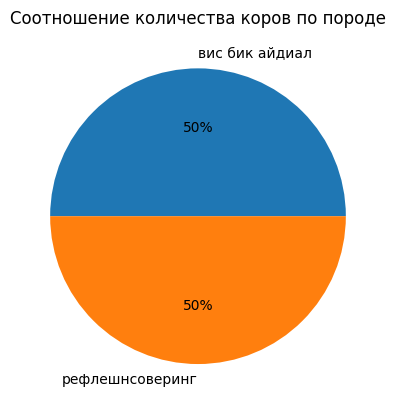

In [73]:
plot_pie_chart(cow_buy['breed'], 'Соотношение количества коров по породе')

#### 4.7.2. <a id='toc4_7_2_'></a>Столбец `pasture_type`       [&#8593;](#toc0_)

In [74]:
cow_buy['pasture_type'].value_counts()

pasture_type
холмистое    8
равнинное    8
Name: count, dtype: int64

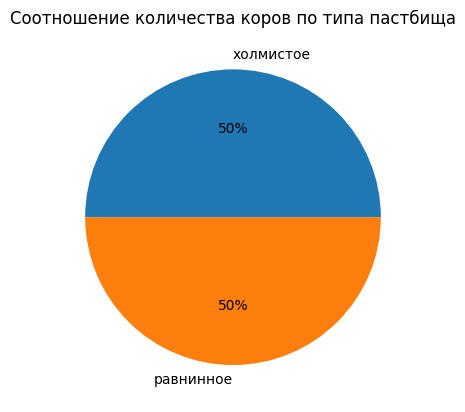

In [75]:
plot_pie_chart(cow_buy['pasture_type'], 'Соотношение количества коров по типа пастбища')

#### 4.7.3. <a id='toc4_7_3_'></a>Столбец `breed_of_daddy`       [&#8593;](#toc0_)

In [76]:
cow_buy['breed_of_daddy'].value_counts()

breed_of_daddy
соверин    10
айдиал      6
Name: count, dtype: int64

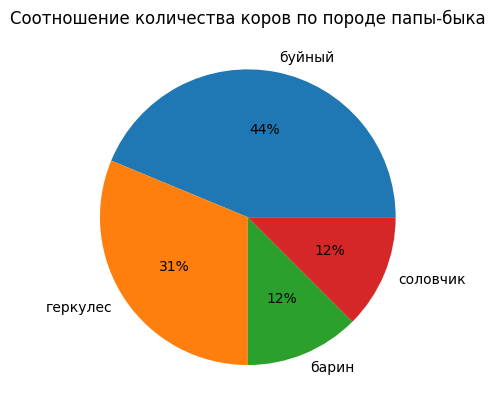

In [77]:
plot_pie_chart(cow_buy['name_of_daddy'], 'Соотношение количества коров по породе папы-быка')

#### 4.7.4. <a id='toc4_7_4_'></a>Столбец `name_of_daddy`       [&#8593;](#toc0_)

In [78]:
cow_buy['name_of_daddy'].value_counts()

name_of_daddy
буйный      7
геркулес    5
барин       2
соловчик    2
Name: count, dtype: int64

#### 4.7.5. <a id='toc4_7_5_'></a>Столбец `fat_content`       [&#8593;](#toc0_)

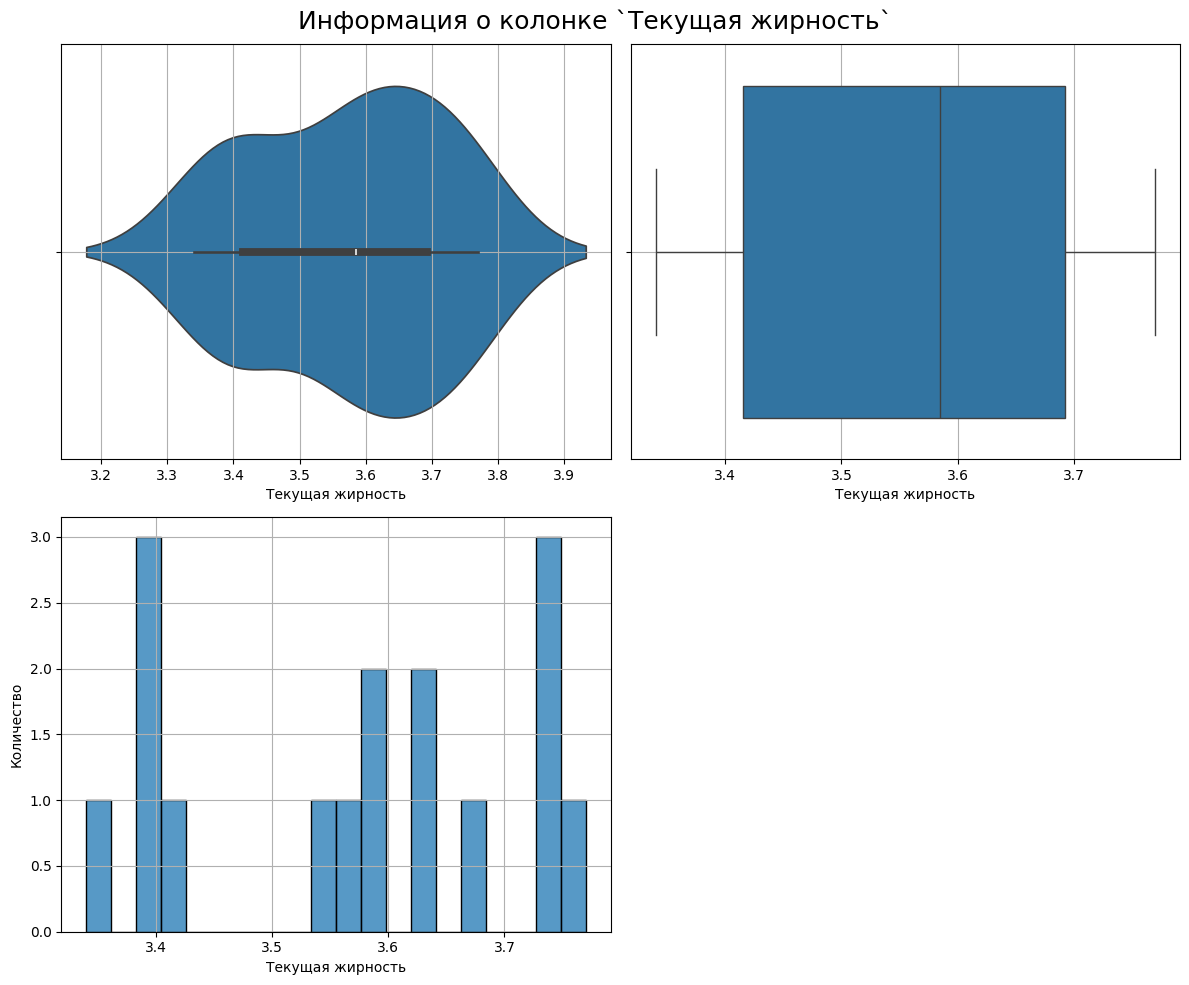

In [79]:
draw_plots_about_column(cow_buy, 'fat_content', 'Текущая жирность')

#### 4.7.6. <a id='toc4_7_6_'></a>Столбец `protein`       [&#8593;](#toc0_)

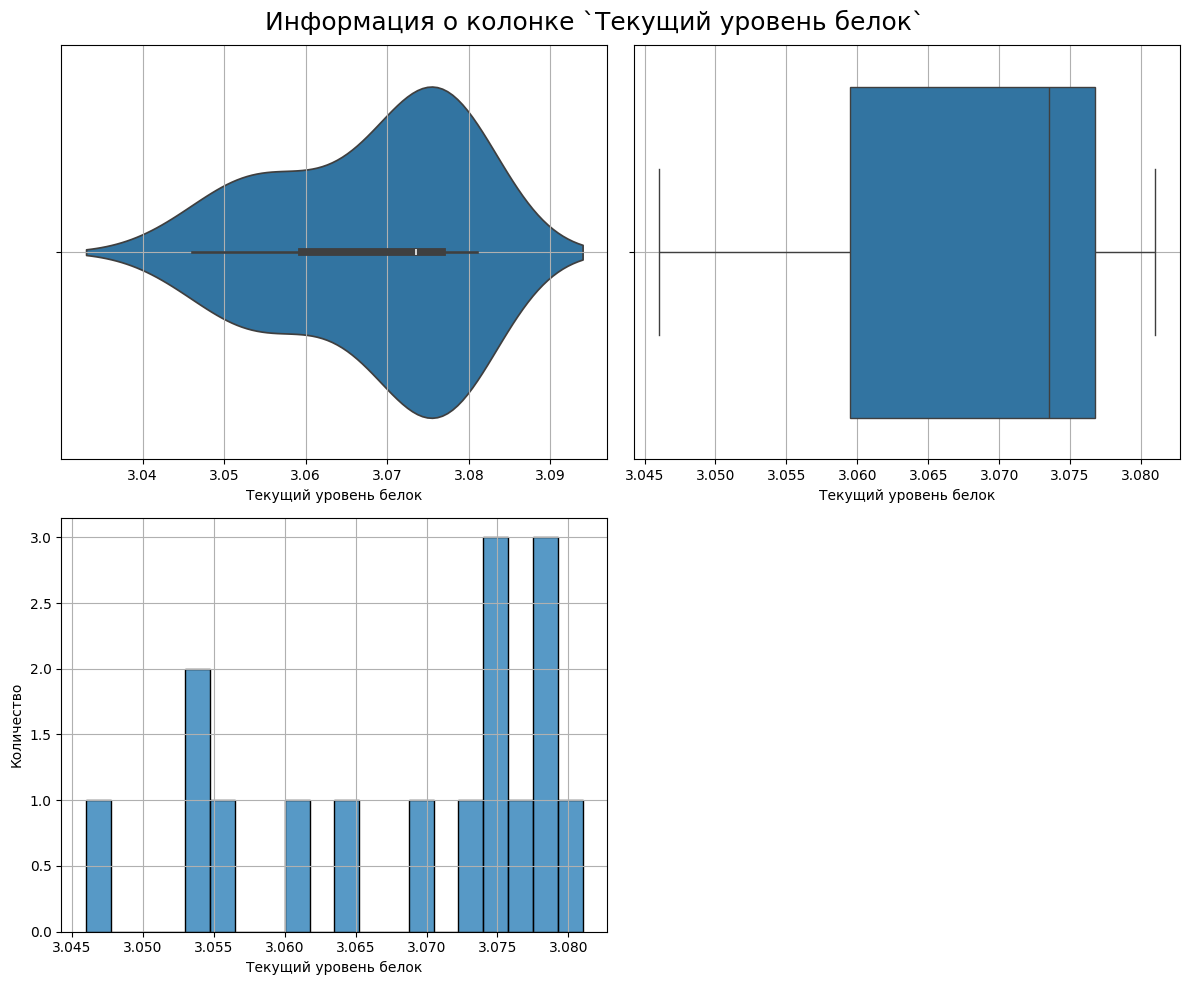

In [80]:
draw_plots_about_column(cow_buy, 'protein', 'Текущий уровень белок')

#### 4.7.7. <a id='toc4_7_7_'></a>Столбец `age`       [&#8593;](#toc0_)

In [81]:
cow_buy['age'].value_counts()

age
более_2_лет    11
менее_2_лет     5
Name: count, dtype: int64

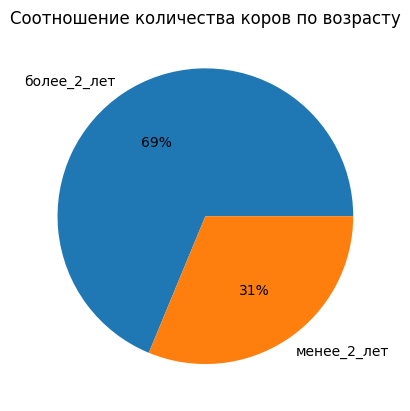

In [82]:
plot_pie_chart(cow_buy['age'], 'Соотношение количества коров по возрасту')

---

In [83]:
original_cow_buy = cow_buy.copy()

### 4.8. <a id='toc4_8_'></a>Промежуточный вывод  [&#8593;](#toc0_)

Мы считали три датасета с различной информацией и обработали их:
- переименовали столбцы
- устранили полные и неявные дубликаты
- проверили пропуски
- проанализировали столбцы с категориальными и числовыми данными
- строковые значения приведены к нижнему регистру и удалены лишние пробелы
- удалили выбросы в случае необходимости


По данным можно сказать, что не все количественные признаки имеют нормальное распределение. Также можно заметить, что в некоторых категориальных столбцах наблюдается дизбаланс классов.

---

## 5. <a id='toc5_'></a>Проверка корреляции      [&#8593;](#toc0_)

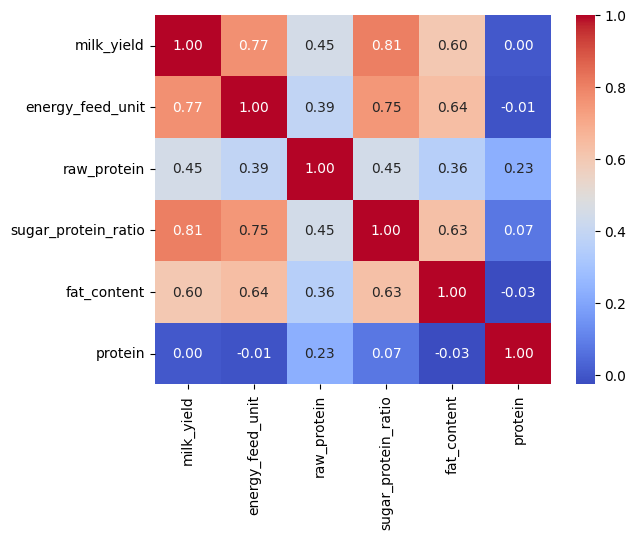

In [84]:
sns.heatmap(ferma_main.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f');

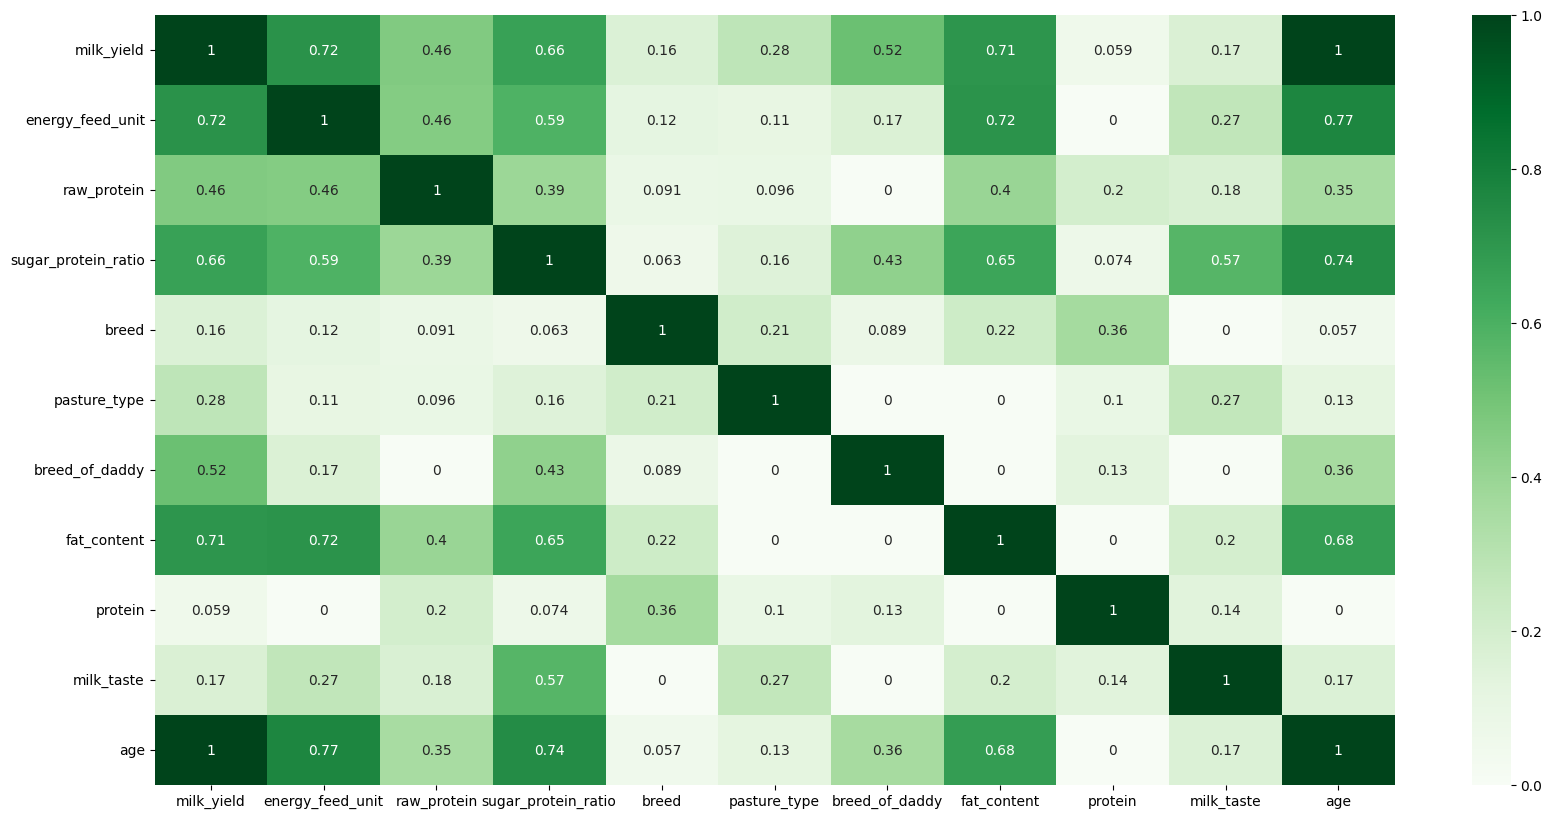

In [85]:
plt.figure(figsize=(20, 10))
phik_corr_matrix = ferma_main.phik_matrix(interval_cols=['milk_yield',
                                          'energy_feed_unit',
                                          'raw_protein',
                                          'sugar_protein_ratio',
                                          'fat_content',
                                          'protein'])
sns.heatmap(
    phik_corr_matrix,
    annot=True,
    fmt='.2g',
    cmap='Greens');

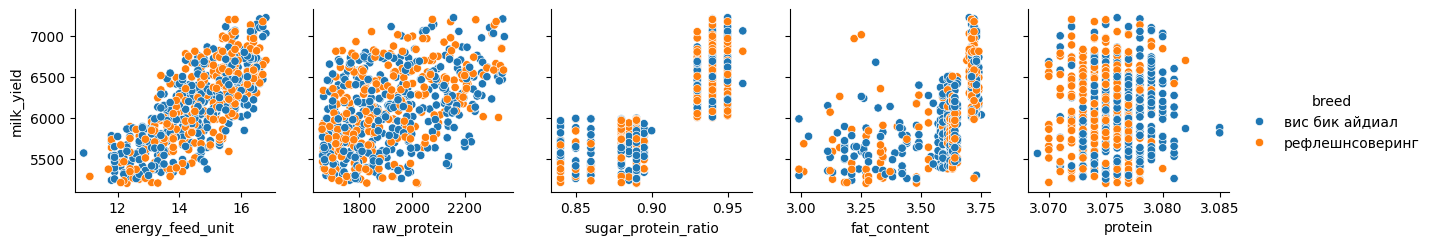

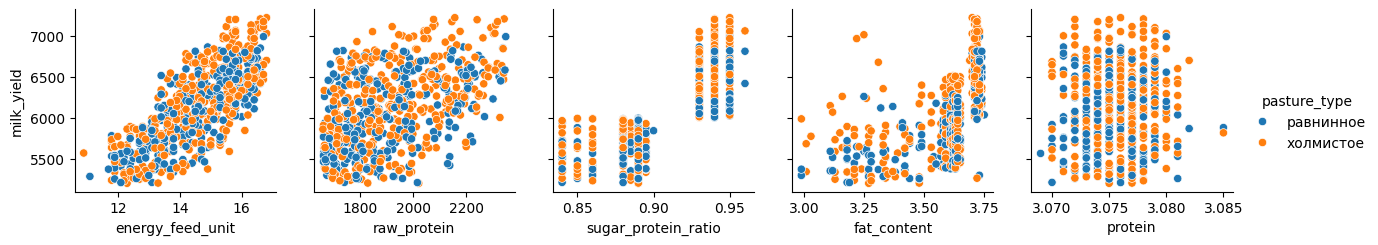

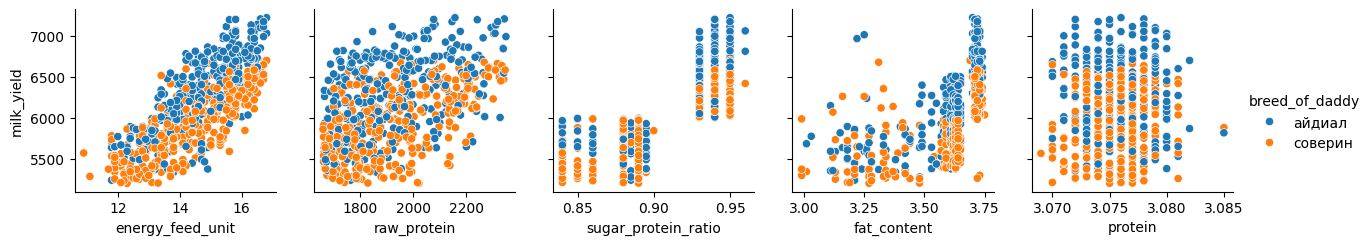

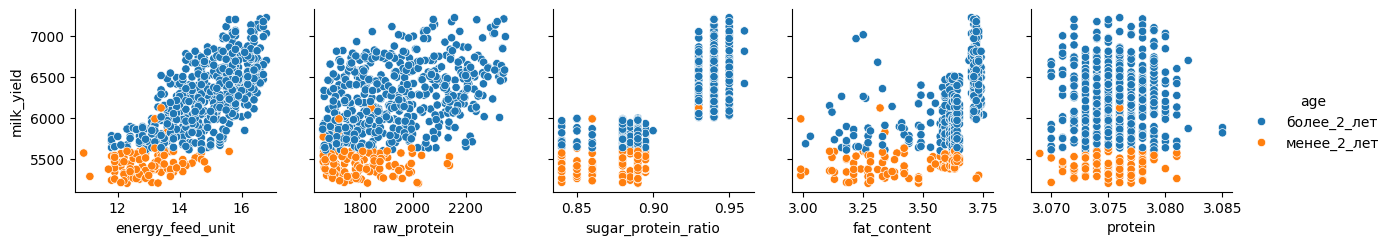

In [86]:
num_cols = ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio', 'fat_content', 'protein']
cat_cols = ['breed', 'pasture_type', 'breed_of_daddy', 'age']

for cat in cat_cols:
    g = sns.PairGrid(data=ferma_main,
                     hue=cat,
                     x_vars=num_cols,
                     y_vars='milk_yield')
    g.map(sns.scatterplot)
    g.add_legend()

---

In [87]:
cols_for_vif = num_cols + ['milk_yield']
df_for_vif = pd.DataFrame(scaler.fit_transform(ferma_main[cols_for_vif]), columns=cols_for_vif)

with_constants = add_constant(df_for_vif)

vif_data = pd.DataFrame()
vif_data["Variable"] = with_constants.columns
vif_data["VIF"] = [variance_inflation_factor(with_constants.values, i) for i in range(with_constants.shape[1])]

vif_data

,Variable,VIF
0,const,1.00
1,energy_feed_unit,2.96
2,raw_protein,1.37
3,sugar_protein_ratio,3.50
4,fat_content,1.88
5,protein,1.09
6,milk_yield,3.56


---

Корреляция между целевыми и входными признаки представлена в таблице ниже:

In [88]:
def map_values_to_class(val: float) -> str:
    if val <= 0.3:
        return 'low'
    elif val <= 0.7:
        return 'medium'
    else:
        return 'high'
    
    
def color_cell(val: str) -> str:
    if val == 'low':
        return 'background-color: lightblue'
    elif val == 'medium':
        return 'background-color: lightyellow'
    else:
        return 'background-color: lightcoral'
    
    
classes_dict = {
    'low': 0,
    'medium': 1,
    'high': 2
}

_df = phik_corr_matrix[['milk_yield', 'milk_taste']]\
    .drop(['milk_yield', 'milk_taste'], axis=0)\
    .map(map_values_to_class)\
    .sort_values(by=['milk_yield', 'milk_taste'],
                 ascending=False,
                 key=lambda x: x.map(classes_dict))
_df.style.map(color_cell)

,milk_yield,milk_taste
energy_feed_unit,high,low
fat_content,high,low
age,high,low
sugar_protein_ratio,medium,medium
raw_protein,medium,low
breed_of_daddy,medium,low
breed,low,low
pasture_type,low,low
protein,low,low


**Вывод**

В результате проведенного корреляционного анализа можно сделать следующие выводы
1) Целевой признак `milk_yield` (удой) имеет нелинейную связь `energy_feed_unit` (ЭКЕ) и `sugar_protein_ratio`  (СПО). В первом случае зависимость имеет околоквадратичный характер, а во втором случае - признак является бинарным.
2) Входные признаки `sugar_protein_ratio` и `energy_feed_unit` имеют сильную взаимную корреляцию, однако назвать это мультиколлинеарностью мы не можем, так как коэффициенты VIF не превышают `5`, и коэффициенты корреляции между ними не превышают `0.9`.

## 6. <a id='toc6_'></a>Регрессия      [&#8593;](#toc0_)

### 6.1. <a id='toc6_1_'></a>Подготовка     [&#8593;](#toc0_)

In [89]:
cols_to_fill = ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio']
for col in cols_to_fill:
    cow_buy[col] = ferma_main[col].median() * 1.05

In [90]:
ferma_main = ferma_main.sort_index(axis=1)
cow_buy = cow_buy.sort_index(axis=1)

In [91]:
target = 'milk_yield'

X = ferma_main.drop([target, 'milk_taste'], axis=1)
X = X.drop(['fat_content', 'protein'], axis=1)

y = ferma_main[target]

### 6.2. <a id='toc6_2_'></a>Первая модель     [&#8593;](#toc0_)

In [92]:
num_cols = ['energy_feed_unit', 'raw_protein', 'sugar_protein_ratio']
cat_cols = ['breed', 'pasture_type', 'breed_of_daddy', 'age']

In [93]:
X_train, X_test, y_train, y_test = process_and_split(X, y, num_cols, cat_cols)

In [94]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred1 = model1.predict(X_test)

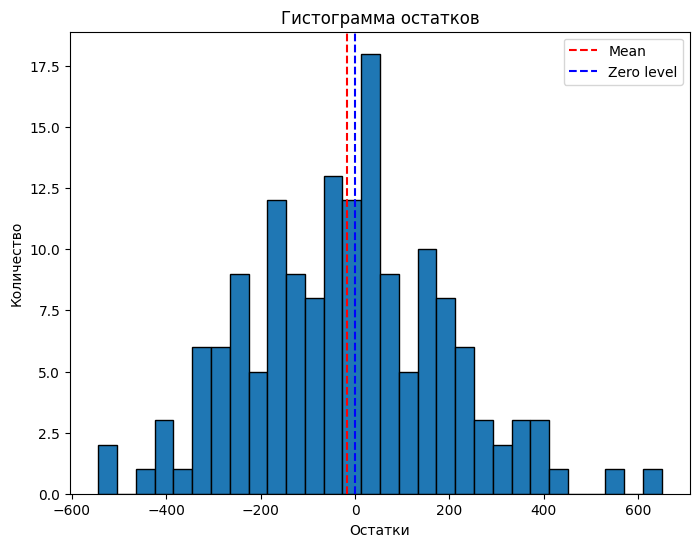

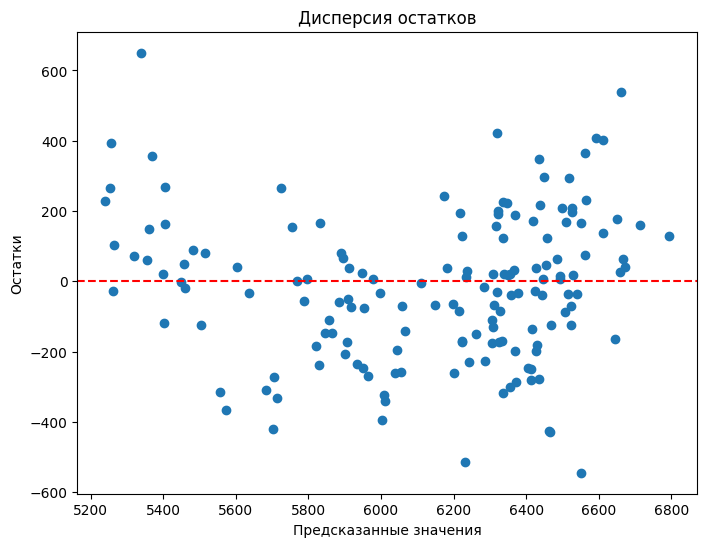

In [95]:
get_info_about_residuals(y_test, y_pred1)

В данном случае мы видим, что остатки больше отрицательные, значит модель несколько завышает предсказания. При этом распределение остатков примерно похоже на нормальное с минимальным смещением.

---

### 6.3. <a id='toc6_3_'></a>Вторая модель     [&#8593;](#toc0_)

Выше было выяснено, что признак `energy_feed_unit` (ЭКЕ) имеет околоквадратичную зависимость. Возведем данный признак в квадрат.

Так же по распределению был сделан вывод, что признак `sugar_protein_ration` (СПО) является бинарным. Преобразуем данный признак.

In [96]:
threshold = 0.91
X['sugar_protein_ratio_class'] = (X['sugar_protein_ratio'] <= threshold).astype('int')
X = X.drop('sugar_protein_ratio', axis=1)

In [97]:
X['sugar_protein_ratio_class'].value_counts()

sugar_protein_ratio_class
0    370
1    258
Name: count, dtype: int64

In [98]:
X['energy_feed_unit_squared'] = X['energy_feed_unit'] ** 2
X = X.drop('energy_feed_unit', axis=1)

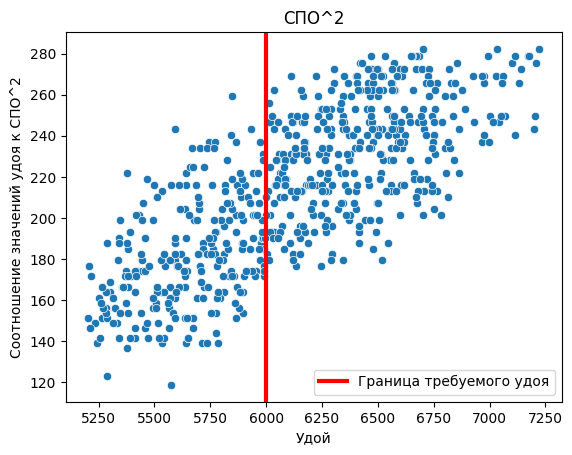

In [99]:
sns.scatterplot(x=y, y=X['energy_feed_unit_squared']);
plt.axvline(x=6000, c='red', lw=3, label='Граница требуемого удоя')
plt.title('СПО^2')
plt.xlabel('Удой')
plt.ylabel('Соотношение значений удоя к СПО^2')
plt.legend()
plt.show()

In [100]:
num_cols = ['energy_feed_unit_squared', 'raw_protein', 'sugar_protein_ratio_class']
cat_cols = ['breed', 'pasture_type', 'breed_of_daddy', 'age']

In [101]:
X_train, X_test, y_train, y_test = process_and_split(X, y, num_cols, cat_cols)

In [102]:
model2 = LinearRegression()
model2.fit(X_train, y_train)
y_pred2 = model2.predict(X_test)

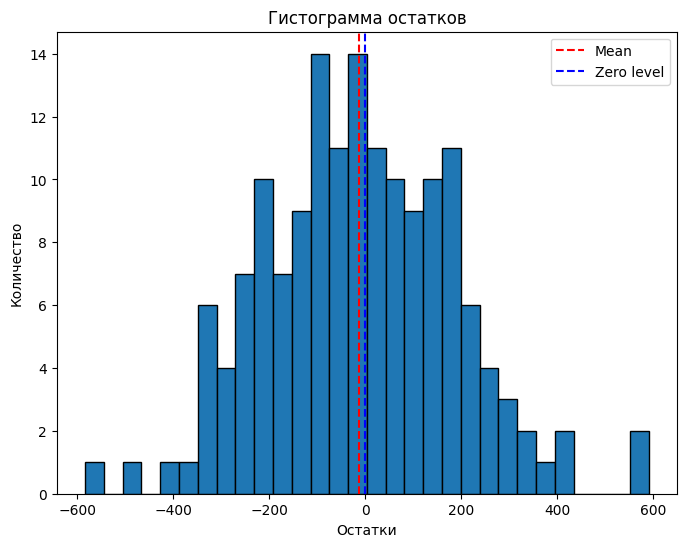

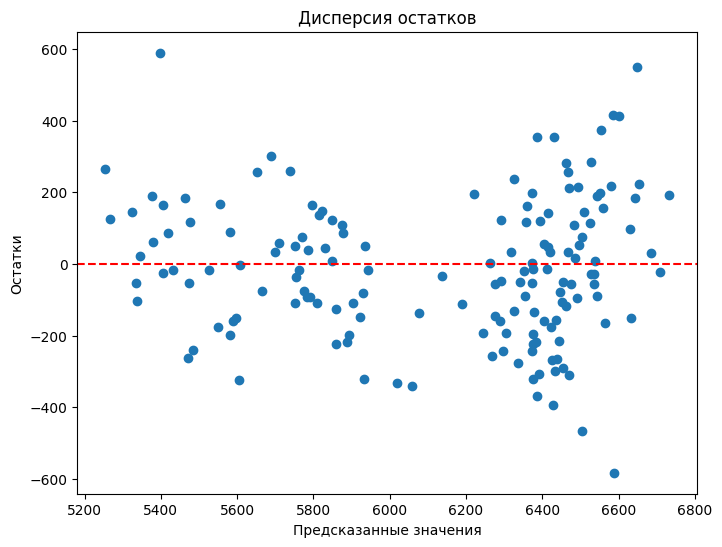

In [103]:
get_info_about_residuals(y_test, y_pred2)

Остатки распределены практически равномерно и без смещения, однако присутствует небольшое количество выбросов. Однако в данном случае дисперсия не постоянно. Для более высоких предсказанных значений, дисперсия выше. А на диапазоне 5900 - 6200, модель только завышает предсказания.

---

### 6.4. <a id='toc6_4_'></a>Третья модель     [&#8593;](#toc0_)

Для третьей модели добавим дополнительный столбец, содержащий информации об имени папы-быка.

In [104]:
ferma_dad.head(2)

,name_of_daddy
id,
1,буйный
2,соловчик


In [105]:
X = X.join(ferma_dad, how='left', on='id')

In [106]:
num_cols = ['energy_feed_unit_squared', 'raw_protein', 'sugar_protein_ratio_class']
cat_cols = ['breed', 'pasture_type', 'breed_of_daddy', 'age', 'name_of_daddy']

In [107]:
X_train, X_test, y_train, y_test = process_and_split(X, y, num_cols, cat_cols)

In [108]:
model3 = LinearRegression()
model3.fit(X_train, y_train)
y_pred3 = model3.predict(X_test)

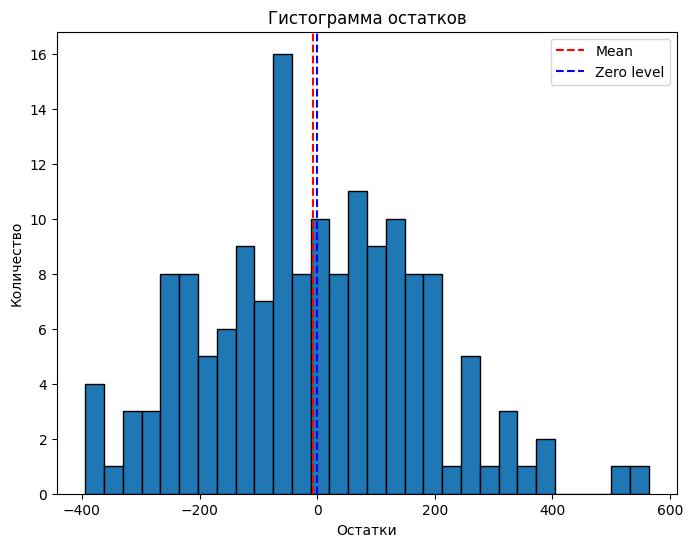

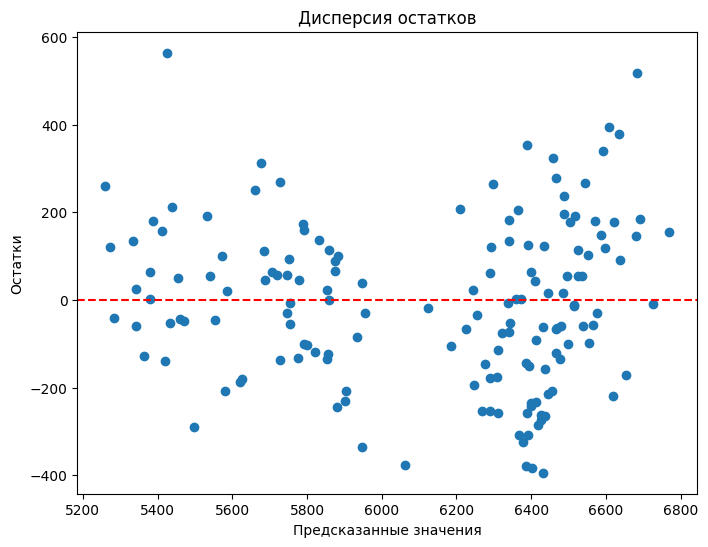

In [109]:
get_info_about_residuals(y_test, y_pred3)

Третья модель показывает примерно такие же результаты. Модель все еще завышает предсказания, также есть небольшие выбросы. Но дисперсия стала более равномерной.

### 6.5. <a id='toc6_5_'></a>Оценка     [&#8593;](#toc0_)

In [110]:
table = PrettyTable()
table.field_names = ['#', 'R2', 'MAE', 'MSE', 'RMSE']

table.add_row([1] + get_metrics(y_test, y_pred1))
table.add_row([2] + get_metrics(y_test, y_pred2))
table.add_row([3] + get_metrics(y_test, y_pred3))

print(table)

+---+------+--------+----------+--------+
| # |  R2  |  MAE   |   MSE    |  RMSE  |
+---+------+--------+----------+--------+
| 1 | 0.78 | 165.75 | 44387.60 | 210.68 |
| 2 | 0.81 | 157.67 | 39034.10 | 197.57 |
| 3 | 0.83 | 149.31 | 34304.88 | 185.22 |
+---+------+--------+----------+--------+


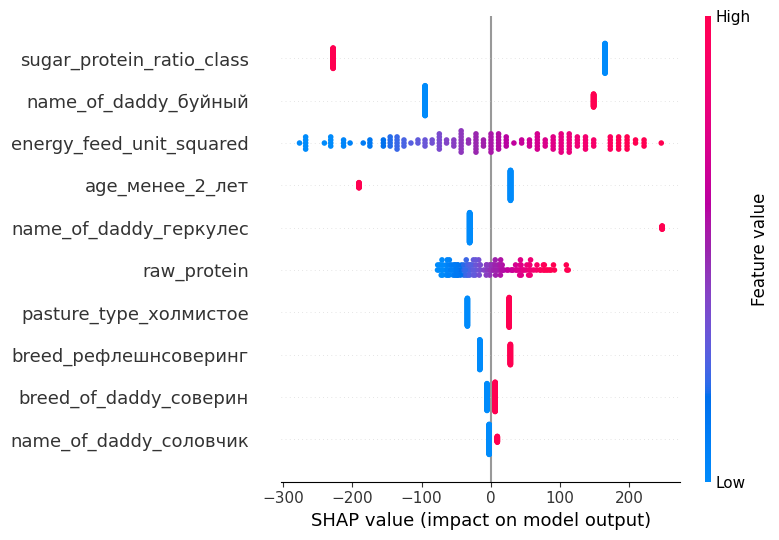

In [111]:
shap_test = shap.LinearExplainer(model3, X_train)
shap.summary_plot(shap_test.shap_values(X_test), X_test, max_display=25, auto_size_plot=True)

В результате проведенного исследования, можно сделать что все 3 модели неидеальны и требуют улучшения, однако 3 модель показывает наилучшие метрики, также она использует признаки, которые являются довольно значимыми. Поэтому для предсказания первого целевого признака - удоя, будет использована именно она.

In [112]:
lower_quantile = np.quantile(y_pred3, 0.025)
upper_quantile = np.quantile(y_pred3, 0.975)

_mask = (y_pred3 >= lower_quantile) & (y_pred3 <= upper_quantile)
filtered = y_pred3[_mask]
print(f'Доверительный интервал: [{filtered.min():.2f} - {filtered.max():.2f}]')

Доверительный интервал: [5341.52 - 6681.61]


### 6.6. <a id='toc6_6_'></a>Предсказание     [&#8593;](#toc0_)

In [113]:
X.head(2)

,age,breed,breed_of_daddy,pasture_type,raw_protein,sugar_protein_ratio_class,energy_feed_unit_squared,name_of_daddy
id,,,,,,,,
1,более_2_лет,вис бик айдиал,айдиал,равнинное,1743,1,201.64,буйный
2,менее_2_лет,вис бик айдиал,соверин,равнинное,2138,1,163.84,соловчик


In [114]:
cow_buy.head(2)

,age,breed,breed_of_daddy,energy_feed_unit,fat_content,name_of_daddy,pasture_type,protein,raw_protein,sugar_protein_ratio
0,более_2_лет,вис бик айдиал,айдиал,15.44,3.58,геркулес,холмистое,3.08,1982.40,0.98
1,менее_2_лет,вис бик айдиал,соверин,15.44,3.54,буйный,равнинное,3.08,1982.40,0.98


---

In [115]:
cow_buy['energy_feed_unit_squared'] = cow_buy['energy_feed_unit'] ** 2
cow_buy['sugar_protein_ratio_class'] = (cow_buy['sugar_protein_ratio'] <= threshold).astype('int')
cow_buy = cow_buy.drop(['energy_feed_unit', 'sugar_protein_ratio'], axis=1)
cow_buy_orig = cow_buy.copy().sort_index(axis=1)
cow_buy = cow_buy.drop(['fat_content', 'protein'], axis=1)

In [116]:
X = X.sort_index(axis=1)
cow_buy = cow_buy.sort_index(axis=1)

In [117]:
X.head(2)

,age,breed,breed_of_daddy,energy_feed_unit_squared,name_of_daddy,pasture_type,raw_protein,sugar_protein_ratio_class
id,,,,,,,,
1,более_2_лет,вис бик айдиал,айдиал,201.64,буйный,равнинное,1743,1
2,менее_2_лет,вис бик айдиал,соверин,163.84,соловчик,равнинное,2138,1


In [118]:
cow_buy.head(2)

,age,breed,breed_of_daddy,energy_feed_unit_squared,name_of_daddy,pasture_type,raw_protein,sugar_protein_ratio_class
0,более_2_лет,вис бик айдиал,айдиал,238.24,геркулес,холмистое,1982.40,0
1,менее_2_лет,вис бик айдиал,соверин,238.24,буйный,равнинное,1982.40,0


---

In [119]:
scaler.fit(X[num_cols]);
encoder.fit(X[cat_cols]);

In [120]:
_encoded = pd.DataFrame(encoder.transform(cow_buy[cat_cols]), columns=encoder.get_feature_names_out())

_scaled = pd.DataFrame(scaler.transform(cow_buy[num_cols]), columns=num_cols)

cow_buy = pd.concat([_scaled, _encoded], axis=1)
cow_buy = cow_buy.sort_index(axis=1)

In [121]:
cow_buy.head()

,age_менее_2_лет,breed_of_daddy_соверин,breed_рефлешнсоверинг,energy_feed_unit_squared,name_of_daddy_буйный,name_of_daddy_геркулес,name_of_daddy_соловчик,pasture_type_холмистое,raw_protein,sugar_protein_ratio_class
0,0.00,0.00,0.00,0.67,0.00,1.00,0.00,1.00,0.32,-0.84
1,1.00,1.00,0.00,0.67,1.00,0.00,0.00,0.00,0.32,-0.84
2,0.00,1.00,1.00,0.67,0.00,0.00,0.00,0.00,0.32,-0.84
3,0.00,0.00,1.00,0.67,1.00,0.00,0.00,1.00,0.32,-0.84
4,0.00,0.00,1.00,0.67,1.00,0.00,0.00,0.00,0.32,-0.84


In [122]:
predicted_milk_yield = model3.predict(cow_buy)

In [123]:
predicted_milk_yield

array([6606.98583679, 6304.52671591, 6324.18533524, 6616.49260749,
       6556.04618944, 6383.43668753, 6523.59832214, 6397.42100126,
       6352.16596121, 6602.50829375, 6606.98583679, 6121.3517759 ,
       6616.49260749, 6352.16596121, 6383.43668753, 6523.59832214])

## 7. <a id='toc7_'></a>Классификация     [&#8593;](#toc0_)

In [124]:
X = X.join([ferma_main[['fat_content', 'protein']]]).sort_index(axis=1)
X.head()

,age,breed,breed_of_daddy,energy_feed_unit_squared,fat_content,name_of_daddy,pasture_type,protein,raw_protein,sugar_protein_ratio_class
id,,,,,,,,,,
1,более_2_лет,вис бик айдиал,айдиал,201.64,3.58,буйный,равнинное,3.08,1743,1
2,менее_2_лет,вис бик айдиал,соверин,163.84,3.54,соловчик,равнинное,3.08,2138,1
3,более_2_лет,рефлешнсоверинг,соверин,196.00,3.59,барин,холмистое,3.07,1854,1
4,более_2_лет,рефлешнсоверинг,айдиал,153.76,3.40,буйный,холмистое,3.08,2012,1
5,менее_2_лет,вис бик айдиал,соверин,163.84,3.73,барин,равнинное,3.07,1675,1


In [125]:
target = 'milk_taste'
y = ferma_main[target]

In [126]:
num_cols = ['energy_feed_unit_squared', 'fat_content', 'raw_protein', 'protein']
cat_cols = ['age', 'breed', 'breed_of_daddy', 'name_of_daddy', 'pasture_type', 'sugar_protein_ratio_class']

In [127]:
X_train, X_test, y_train, y_test = process_and_split(X, y, num_cols, cat_cols, stratify_by=y)

In [128]:
y_train = (y_train == 'вкусно').astype(int)
y_test = (y_test == 'вкусно').astype(int)

In [129]:
y_train[:5]

id
624    0
565    0
202    1
215    0
194    0
Name: milk_taste, dtype: int64

In [130]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:, 1]

In [131]:
threshold = 0.5

In [132]:
y_pred = y_pred_prob >= threshold

In [133]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      0.37      0.43        65
           1       0.63      0.75      0.68        92

    accuracy                           0.59       157
   macro avg       0.57      0.56      0.56       157
weighted avg       0.58      0.59      0.58       157



Для нас является более критичной ошибка I рода - ложноположительное заключение. Так как в таком случае фермер купит "плохую" корову.

Поэтому в качестве основной метрики была выбрана `precision`.

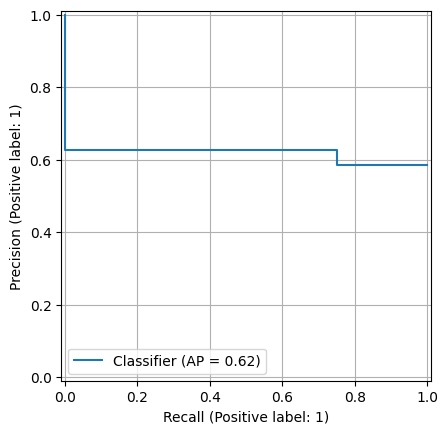

In [134]:
PrecisionRecallDisplay.from_predictions(y_test, y_pred)
plt.grid()
plt.show()

In [135]:
_table = PrettyTable()
_table.field_names = ['threshold', 'recall', 'precision']

thresholds = np.arange(0, 1.01, 0.01)
precisions = []

for threshold in thresholds:
    threshold = round(threshold, 2)
    y_pred = y_pred_prob >= threshold
    recall = round(recall_score(y_test, y_pred, zero_division=1), 2)
    precision = round(precision_score(y_test, y_pred, zero_division=1), 2)
    
    precisions.append(precision)
    
    color = 'green' if precision == 1.0 else None
    _table.add_row([threshold, recall, colored(precision, color)])

print(_table)

+-----------+--------+-----------+
| threshold | recall | precision |
+-----------+--------+-----------+
|    0.0    |  1.0   |    0.59   |
|    0.01   |  1.0   |    0.59   |
|    0.02   |  1.0   |    0.59   |
|    0.03   |  1.0   |    0.59   |
|    0.04   |  1.0   |    0.59   |
|    0.05   |  1.0   |    0.59   |
|    0.06   |  1.0   |    0.59   |
|    0.07   |  1.0   |    0.59   |
|    0.08   |  1.0   |    0.59   |
|    0.09   |  1.0   |    0.59   |
|    0.1    |  1.0   |    0.59   |
|    0.11   |  1.0   |    0.59   |
|    0.12   |  1.0   |    0.59   |
|    0.13   |  1.0   |    0.59   |
|    0.14   |  1.0   |    0.59   |
|    0.15   |  1.0   |    0.59   |
|    0.16   |  1.0   |    0.59   |
|    0.17   |  1.0   |    0.59   |
|    0.18   |  1.0   |    0.59   |
|    0.19   |  1.0   |    0.59   |
|    0.2    |  1.0   |    0.6    |
|    0.21   |  1.0   |    0.61   |
|    0.22   |  1.0   |    0.61   |
|    0.23   |  1.0   |    0.61   |
|    0.24   |  1.0   |    0.62   |
|    0.25   |  1.0  

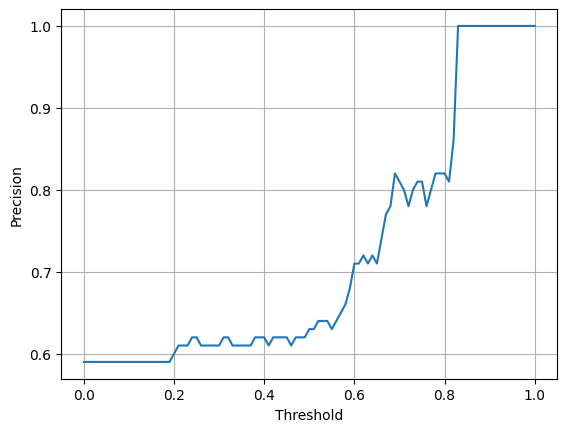

In [136]:
plt.plot(thresholds, precisions)
plt.grid()
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.show()

Пороговое значение `0.83` обеспечивает нулевую ошибку I рода.

In [137]:
threshold = 0.83
y_pred = y_pred_prob >= threshold

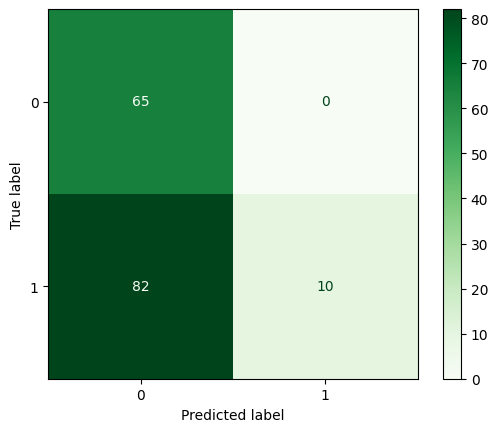

In [138]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='Greens');

### 7.1. <a id='toc7_1_'></a>Предсказание    [&#8593;](#toc0_)

In [139]:
cow_buy = cow_buy.join(cow_buy_orig[['fat_content', 'protein']])\
                 .rename(columns={'sugar_protein_ratio_class': 'sugar_protein_ratio_class_1'})\
                 .sort_index(axis=1)

In [140]:
cow_buy.head()

,age_менее_2_лет,breed_of_daddy_соверин,breed_рефлешнсоверинг,energy_feed_unit_squared,fat_content,name_of_daddy_буйный,name_of_daddy_геркулес,name_of_daddy_соловчик,pasture_type_холмистое,protein,raw_protein,sugar_protein_ratio_class_1
0,0.00,0.00,0.00,0.67,3.58,0.00,1.00,0.00,1.00,3.08,0.32,-0.84
1,1.00,1.00,0.00,0.67,3.54,1.00,0.00,0.00,0.00,3.08,0.32,-0.84
2,0.00,1.00,1.00,0.67,3.59,0.00,0.00,0.00,0.00,3.07,0.32,-0.84
3,0.00,0.00,1.00,0.67,3.40,1.00,0.00,0.00,1.00,3.06,0.32,-0.84
4,0.00,0.00,1.00,0.67,3.64,1.00,0.00,0.00,0.00,3.07,0.32,-0.84


In [141]:
predicted_milk_taste_proba = model.predict_proba(cow_buy)[:, 1]
predicted_milk_taste = (predicted_milk_taste_proba >= threshold).astype(int)

In [142]:
cow_buy_result = cow_buy.join([
    pd.Series(predicted_milk_yield, name='milk_yield'),
    pd.Series(predicted_milk_taste, name='milk_taste')
])

In [143]:
cow_buy_result.head()

,age_менее_2_лет,breed_of_daddy_соверин,breed_рефлешнсоверинг,energy_feed_unit_squared,fat_content,name_of_daddy_буйный,name_of_daddy_геркулес,name_of_daddy_соловчик,pasture_type_холмистое,protein,raw_protein,sugar_protein_ratio_class_1,milk_yield,milk_taste
0,0.00,0.00,0.00,0.67,3.58,0.00,1.00,0.00,1.00,3.08,0.32,-0.84,6606.99,0
1,1.00,1.00,0.00,0.67,3.54,1.00,0.00,0.00,0.00,3.08,0.32,-0.84,6304.53,0
2,0.00,1.00,1.00,0.67,3.59,0.00,0.00,0.00,0.00,3.07,0.32,-0.84,6324.19,0
3,0.00,0.00,1.00,0.67,3.40,1.00,0.00,0.00,1.00,3.06,0.32,-0.84,6616.49,0
4,0.00,0.00,1.00,0.67,3.64,1.00,0.00,0.00,0.00,3.07,0.32,-0.84,6556.05,0


In [144]:
_mask = (cow_buy_result['milk_yield'] >= 6_000) & (cow_buy_result['milk_taste'] == 1)
chosen_cows = cow_buy_result[_mask].sort_values(by='milk_yield', ascending=False)
chosen_cows

,age_менее_2_лет,breed_of_daddy_соверин,breed_рефлешнсоверинг,energy_feed_unit_squared,fat_content,name_of_daddy_буйный,name_of_daddy_геркулес,name_of_daddy_соловчик,pasture_type_холмистое,protein,raw_protein,sugar_protein_ratio_class_1,milk_yield,milk_taste


Ни одна корова не подходит под требования, так как порог оказался слишком высоким. Наиболее вероятно, что из-за шума в данных порог, расчитанный на обучающих данных, не может быть использован на реальных данных.

Если все таки необходимо купить коров, то наиболее привлекательными дл покупки могут быть следующие:

In [145]:
cow_buy_result\
    .join(pd.Series(predicted_milk_taste_proba, name='probability_of_taste_milk'))\
    .sort_values(by=['probability_of_taste_milk', 'milk_yield'], ascending=False)\
    .iloc[:5]

,age_менее_2_лет,breed_of_daddy_соверин,breed_рефлешнсоверинг,energy_feed_unit_squared,fat_content,name_of_daddy_буйный,name_of_daddy_геркулес,name_of_daddy_соловчик,pasture_type_холмистое,protein,raw_protein,sugar_protein_ratio_class_1,milk_yield,milk_taste,probability_of_taste_milk
11,1.00,1.00,0.00,0.67,3.42,0.00,0.00,0.00,1.00,3.08,0.32,-0.84,6121.35,0,0.76
12,0.00,0.00,1.00,0.67,3.40,1.00,0.00,0.00,1.00,3.06,0.32,-0.84,6616.49,0,0.73
3,0.00,0.00,1.00,0.67,3.40,1.00,0.00,0.00,1.00,3.06,0.32,-0.84,6616.49,0,0.73
0,0.00,0.00,0.00,0.67,3.58,0.00,1.00,0.00,1.00,3.08,0.32,-0.84,6606.99,0,0.73
10,0.00,0.00,0.00,0.67,3.68,0.00,1.00,0.00,1.00,3.05,0.32,-0.84,6606.99,0,0.73


## 8. <a id='toc8_'></a>Общий вывод   [&#8593;](#toc0_)

В рамках данного проекта было проведено исследование эффективности коров в зависимости от различных критериев. Для анализа были предоставлены следующие признаки:
- ЭКЕ
- Сырой протеин
- СПО
- Порода
- Тип пастбища
- Порода папы-быка
- Жирность
- Белок

Целевыми в свою очередь являлись:
- Удой
- Вкус молока

---

В рамках предобработки:
- Все колонки были переведены на английский язык и переименованы для соответствия общепринятому стилю.
- Обработаны неверные типы данных.
- Удалены полные дубликаты.
- Проверены и обработаны неявные дубликаты.
- Проверены пропуски.
- Все текстовые значения преобразованы к нижнему регистру и удалены все лишние пробелы.
- В колонке Удой был обнаружен и удален явный выброс.

---

Далее данные были подготовлены для моделей МО:
- Удаления столбцы `fat_content` и `protein`, так как они являются свойствами молока и не могут быть использованы при обучении, это ведет к некоторой *утечке*.
- Категориальные признаки закодированы с помощью `OneHotEncoder`
- Количественные признаки преобразованы с помощью `StandardScaler`

---

Далее были обучены 3 модели линейной регрессии для предсказания одного из целевых признаков - удоя.

**1 модель**  
Модель обучена на обработанных данных исходного датасета.

**2 модель**  
Признак СПО был преобразован в бинарный. Все значения были отнесены к одному из двух классов.  
Признак ЭКЕ был возведен в квадрат для удаления нелинейности.

**3 модель**  
К оригинальному датасету был добавлен датасет с информацией о кличке папы-быка.

Каждая модель показывала более хорошие метрики, по сравнению с предыдущими. Полная таблица метрик представлена ниже:  

| # | R2   | MAE    | MSE      | RMSE   |
|---|------|--------|----------|--------|
| 1 | 0.78 | 165.75 | 44387.60 | 210.68 |
| 2 | 0.81 | 157.67 | 39034.10 | 197.57 |
| 3 | 0.83 | 149.31 | 34304.88 | 185.22 |


---

Далее была использована модель логистической регрессии для предсказания другого целевого признака - вкуса молока. На выходе модели была получена вероятность того, что молоко окажется вкусным. Далее было необходимо выбрать порог разделения и соответствующую метрику для оценки. Для нас является более критичной ошибка I рода - ложноположительное заключение. Так как в таком случае фермер купит "плохую" корову. Поэтому в качестве основной метрики была выбрана `precision`. В итоге был выбран порог `0.83`, что свело ошибку I рода к нулю, а значит выбранная метрика приняла значение `1`.

---
**Итоговые рекомендации**

После получения предсказаний и фильтрации, мы видим, что из предложенного списка для покупки нельзя рекомендовать ни одну из коров.

---

Чтобы улучшить регрессионную модель, можно:
- устранить нелинейность, например, возвести значения в квадрат.
- преобразовать признак к бинарному классу.
- попробовать комбинировать признаки, например, перемножить один признак на другой.
- удалить признаки со слишком сильной или слишком слабой линейной связью.

---

В рамках задачи классификации наиболее значимыми являются следующие метрики:
- accuracy
- recall
- precision
- R2 
- F1 мера